## Machine Learning Model Building Pipeline: Data Analysis


===================================================================================================

## Predicting Client Arrears

The aim of the project is to build a machine learning model to predict the Clients Arrears based on different explanatory variables describing aspects of profile and bureaus. 

### Why is this important? 

Predicting client arrears is useful to identify trustful clients, or to determine whether the client will have an acceptable rate of miss-payments.

### What is the objective of the machine learning model?

We aim to minimise the difference between the maximum arrear of a client and the arrear estimated by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### How do I get the dataset?

AWS Account:
S3 Bucket:
S3 Path:
Contact: 
Dataset name:
Dataset date:
Dataset time range:

**Note the following:**
-  You need to have access to the aws console and be able to read Bucket specifyed path.
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## Clients tuca and directSale dataset: Data Analysis

In the following cells, we will analyse the variables of the Tuca and directSale join dataset. We will take you through the different aspects of the analysis of the variables, and introduce you to the meaning of each of the variables in the dataset as well. If you want to know more about this dataset, visit [SharePoint - BI- DS - CCH First Credit](https://bowpigt.sharepoint.com/:w:/s/bi/EVJRL7xV9zlIrbiBTJCq1n4Bepnrzf7jmsyTxKNRzI0utA?e=9GkkY5).


In [59]:
target_var = 'maxmora'
identifier = ['ide_tramite', 'ide_cui', 'id_credito', 'id_solicitud', 'id_tramite']

In [60]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [111]:
# load dataset
data = pd.read_csv('dataset.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(27638, 151)


,id_solicitud,key_solicitud,id_credito,maxmora,qty_meses_desde_desembolso,dfi_solicitud_mora,dfi_solicitud_productos,cl_unq_act_act_messolicitud,cl_unq_act_act_trimestresolicitud,active_cch3_months,ide_tramite,id_tramite,ide_cui,cl_unq_act_act_fechasolicitud,cl_unq_act_act_fechasolicitud_date,cl_unq_act_act_monto,cl_unq_act_act_plazo,cl_unq_act_act_agencia,cl_unq_act_act_ptodestino,cl_unq_act_act_flagaprobado,cl_unq_act_act_longlat,cl_unq_act_act_longitud,cl_unq_act_act_latitud,cl_unq_act_act_depnacimiento,cl_unq_act_act_estadocivil,cl_unq_act_act_estadocivilmodificado,cl_unq_act_act_genero,cl_unq_act_act_profesion,cl_unq_act_act_profesionmodificada,cl_unq_act_act_flagpuedeescribir,cl_unq_act_act_flagpuedeleer,cl_unq_act_act_flaghablaespa_ol,cl_unq_act_act_flagpuedefirmar,cl_unq_act_act_flaghablaotroidioma,cl_unq_act_act_nivelacademico,cl_unq_act_act_tiempovivirresidencia,cl_unq_act_act_tipovivienda,cl_unq_act_act_personasdependientes,cl_unq_act_act_tipolocalidad,cl_unq_act_act_topografia,cl_unq_act_act_flagaccesovehicular,cl_unq_act_act_tipoaccesovehicular,cl_unq_act_act_tipoaccesopeatonal,cl_unq_act_act_flagaccesomensajeros,cl_unq_act_act_flagpidenimpuesto,cl_unq_act_act_vivtipoconstruccion,cl_unq_act_act_cantidadniveles,cl_unq_act_act_cantidaddormitorios,cl_unq_act_act_cantidadba_os,cl_unq_act_act_flagtienecocina,cl_unq_act_act_flagtienesala,cl_unq_act_act_flagtienejardin,cl_unq_act_act_flagtienegarage,cl_unq_act_act_flagtienecomedor,cl_unq_act_act_vehiculo,cl_unq_act_act_fuenteingresos,cl_unq_act_act_tiponegocio,cl_unq_act_act_depnegocio,cl_unq_act_act_flagvendealcredito,cl_unq_act_act_negociomontoventasefectivo,cl_unq_act_act_negociototalingresos,cl_unq_act_act_totalbienes,cl_unq_act_act_totalpasivos,cl_unq_act_act_totalgastosfam,cl_unq_act_act_totalingresosfam,cl_unq_act_act_estresventas,cl_unq_act_act_estrescostoventas,cl_unq_act_act_estresgrossprofit,cl_unq_act_act_flagtieneelectricidad,cl_unq_act_act_flagtieneagua,cl_unq_act_act_flagtienetelfijo,cl_unq_act_act_flagtienecelular,cl_unq_act_act_flagtienetvcable,cl_unq_act_act_flagtienerefrigerador,cl_unq_act_act_flagtienelavadora,cl_unq_act_act_flagtienesecadora,cl_unq_act_act_flagtienehorno,cl_unq_act_act_flagtienemicroondas,cl_unq_act_act_flagtienestereo,cl_unq_act_act_fnacimiento_date,cl_unq_act_act_finicionegocio_date,cl_unq_act_act_fnacimiento_date_numberlong,cl_unq_act_act_finicionegocio_date_numberlong,id_mora,fecha_de_cierre_mora,fecha_consulta_date_mora,cl_cnt_12m_act_comcantidadmora1,cl_cnt_24m_act_comcantidadmora1,cl_cnt_12m_act_comcantidadmora2,cl_cnt_24m_act_comcantidadmora2,cl_des_12m_act_commaxdesvmora,cl_des_24m_act_commaxdesvmora,cl_max_12m_act_commaxmora,cl_max_24m_act_commaxmora,cl_max_act_act_commaxmora,cl_cnt_12m_act_ptocantidadmora1,cl_cnt_24m_act_ptocantidadmora1,cl_cnt_12m_act_ptocantidadmora2,cl_cnt_24m_act_ptocantidadmora2,cl_max_12m_act_ptomaxdesvmora,cl_max_24m_act_ptomaxdesvmora,cl_max_12m_act_ptomaxmora,cl_max_24m_act_ptomaxmora,cl_max_act_act_ptomaxmora,cl_cnt_12m_act_tccantidadmora1,cl_cnt_24m_act_tccantidadmora1,cl_cnt_12m_act_tccantidadmora2,cl_cnt_24m_act_tccantidadmora2,cl_des_12m_act_tcmaxdesvmora,cl_des_24m_act_tcmaxdesvmora,cl_max_12m_act_tcmaxmora,cl_max_24m_act_tcmaxmora,cl_unq_act_act_tcmoraact,cl_cnt_12m_act_servcantidadmora1,cl_cnt_12m_act_servcantidadmora2,cl_des_12m_act_servmaxdesvmora,cl_max_12m_act_servmaxmora,cl_max_act_act_servmaxmora,id_productos,fecha_de_cierre_productos,fecha_consulta_date_tu,cl_min_his_act_ptoexptotal,cl_min_his_act_ptoexpvig,cl_cnt_his_act_comcantidadtotal,cl_sum_his_act_commontototal,cl_cnt_act_act_comcantidadvig,cl_sum_act_act_commontovig,cl_sum_act_act_comsaldoenmora,cl_sum_act_act_comsaldovig,cl_cnt_his_act_ptocantidadtotal,cl_sum_his_act_ptomontototal,cl_cnt_act_act_ptocantidadvig,cl_sum_act_act_ptomontovigente,cl_sum_act_act_ptosaldomora,cl_sum_act_act_ptosaldovig,cl_cnt_act_act_servcantidadvig,cl_sum_act_act_servsaldomora,cl_sum_act_act_servsaldovig,cl_cnt_his_act_tccantidadtotal,cl_sum_his_ac

The dataset contains 1000 rows, i.e., creditRequests, and 135 columns, i.e., variables. 

**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: maxmora

### Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [4]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values
data[vars_with_na].isnull().mean()

dfi_solicitud_mora                             0.830596
dfi_solicitud_productos                        0.775852
cl_unq_act_act_plazo                           0.020624
cl_unq_act_act_agencia                         1.000000
cl_unq_act_act_longlat                         0.031442
                                                 ...   
cl_sum_act_act_tcporcentajesaldomora           0.998336
cl_sum_act_act_tcporcentajeutilizacion         0.997901
cl_sum_act_act_ptoporcentajepagadomontosvig    0.875425
cl_sum_act_act_ptoporcentajesaldoenmora        0.876692
cl_sum_act_act_servporcentajesaldomora         0.999819
Length: 109, dtype: float64

Our dataset contains a few variables with missing values. We need to account for this in our following notebook, where we will engineer the variables for use in Machine Learning Models.

#### Relationship between values being missing and maxmora

Let's evaluate the maxmora of the credit in those observations where the information is missing, for each variable.

In [5]:
#data.groupby('cl_unq_act_act_longlat')['maxmora'].count()

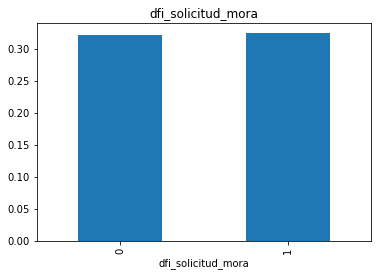

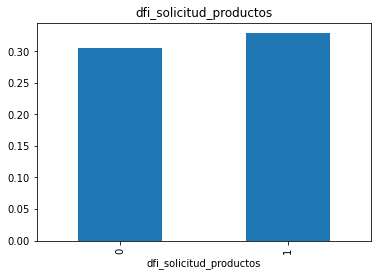

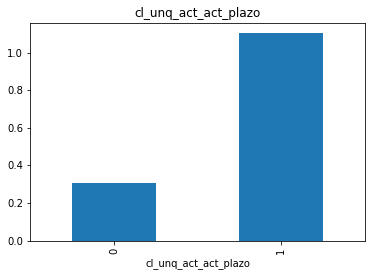

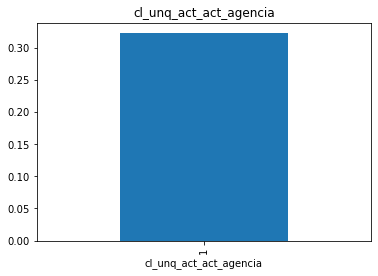

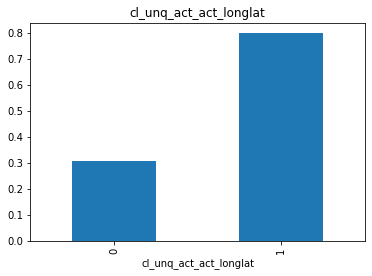

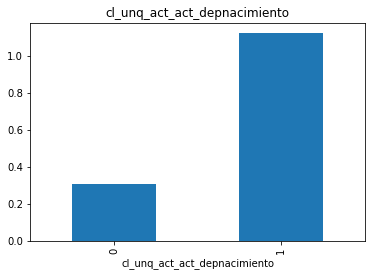

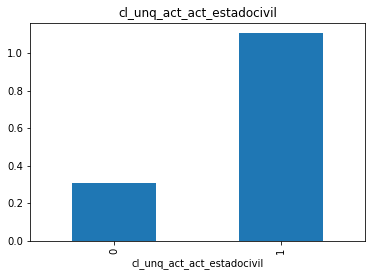

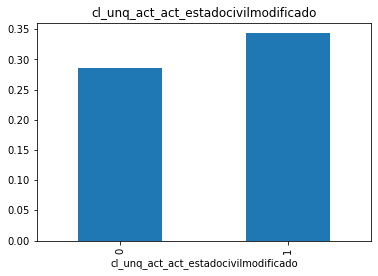

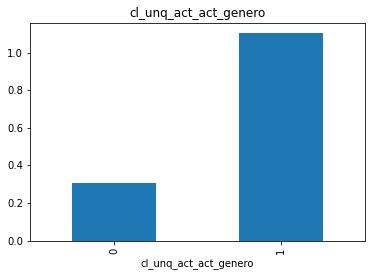

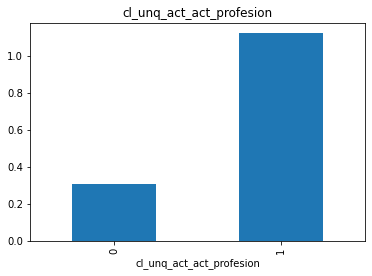

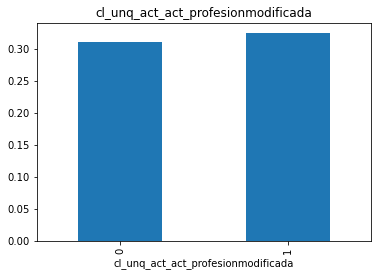

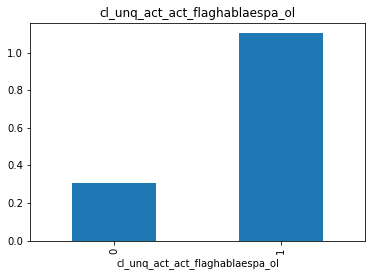

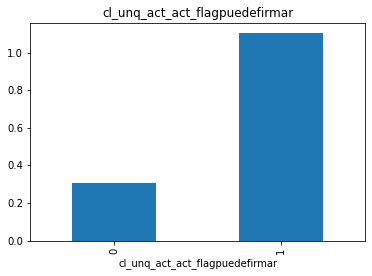

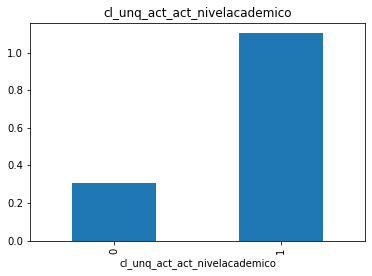

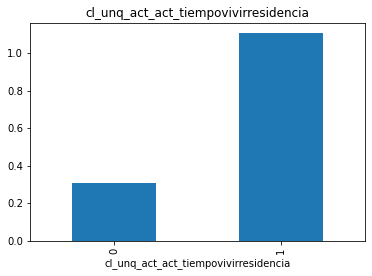

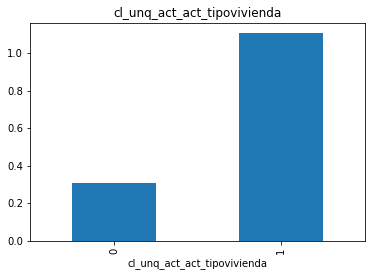

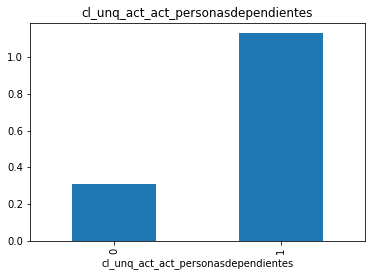

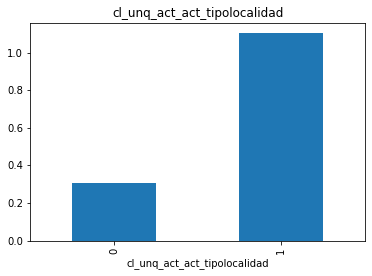

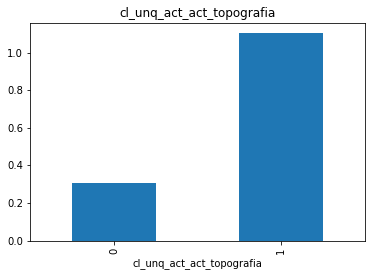

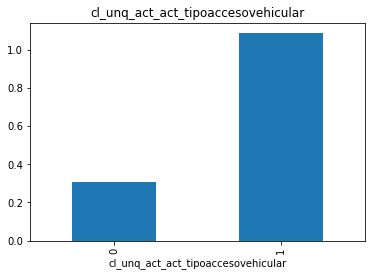

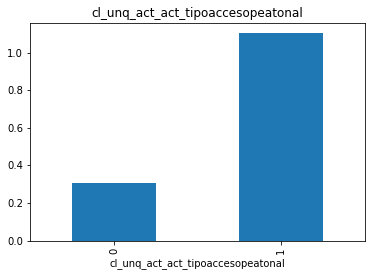

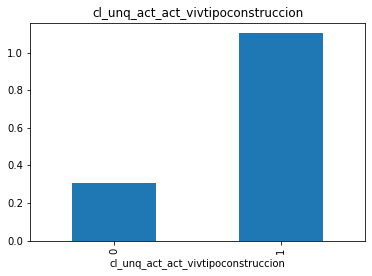

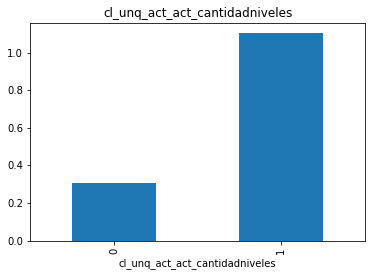

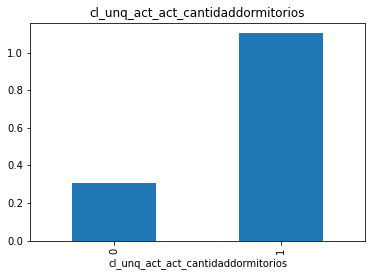

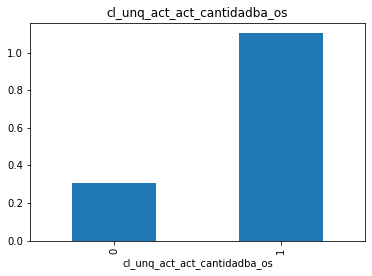

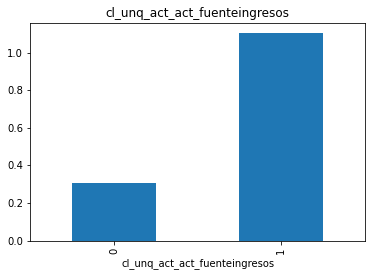

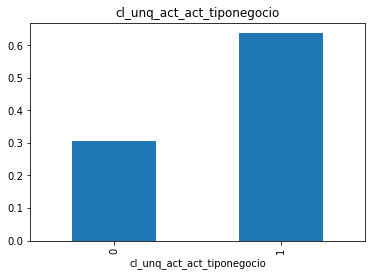

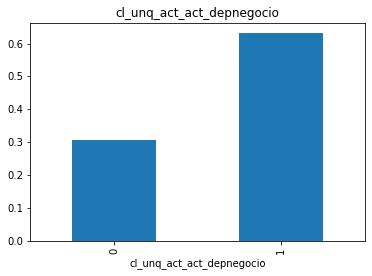

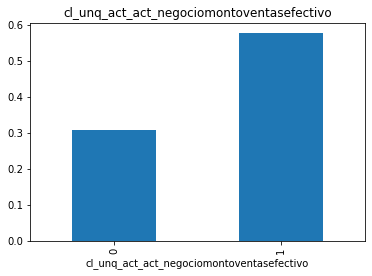

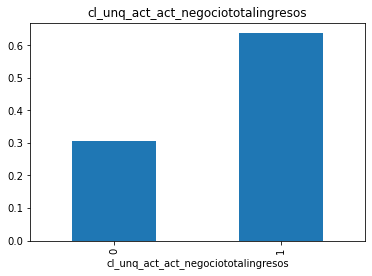

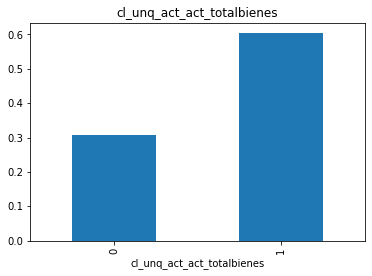

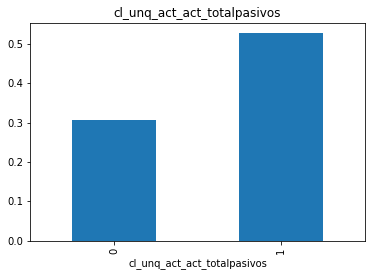

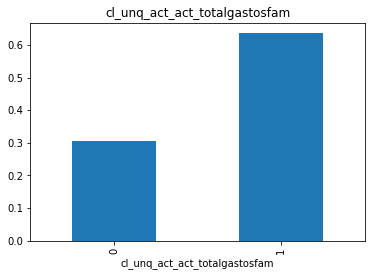

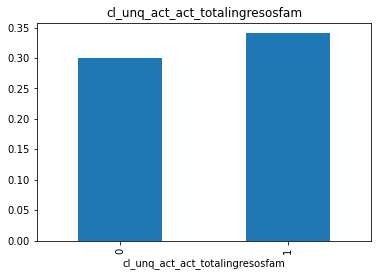

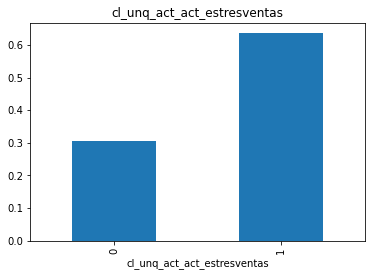

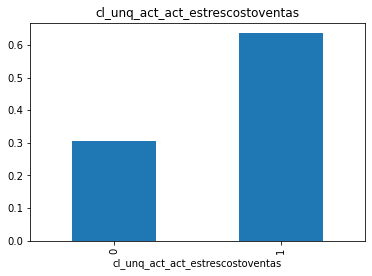

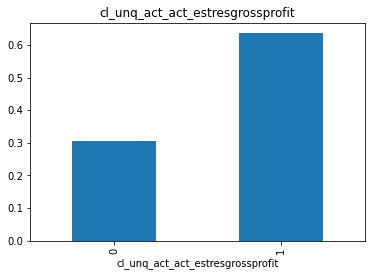

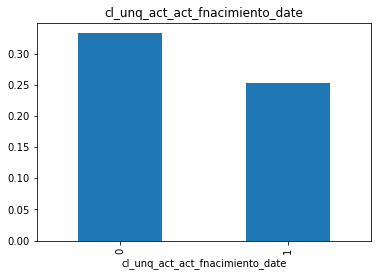

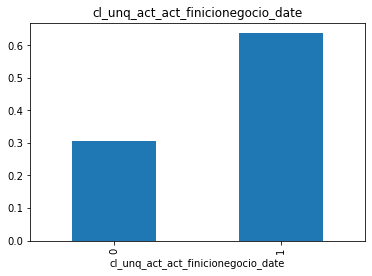

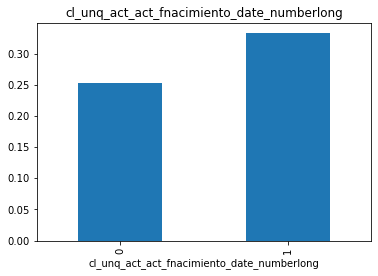

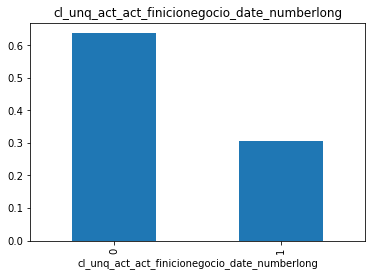

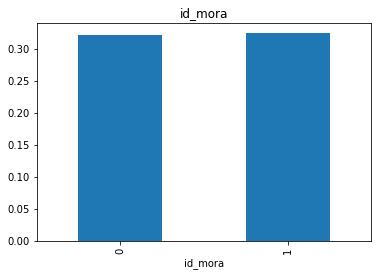

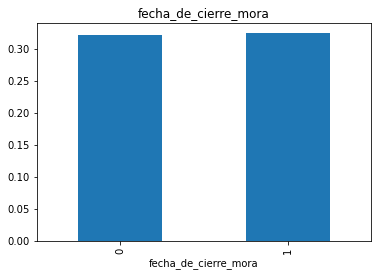

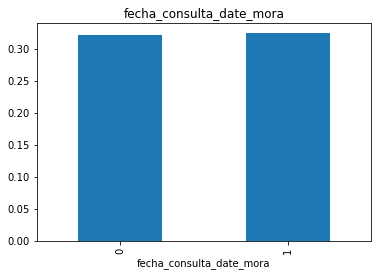

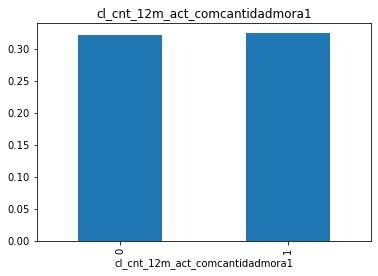

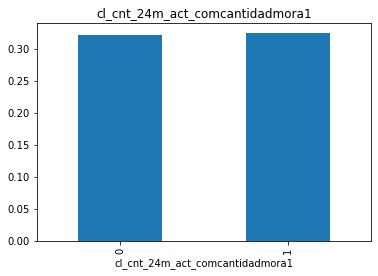

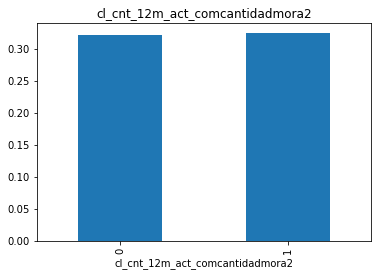

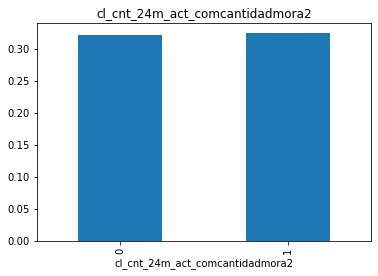

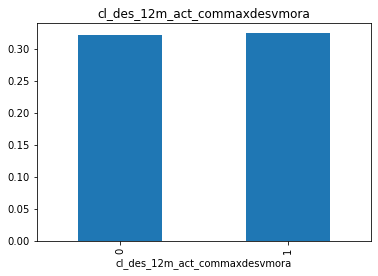

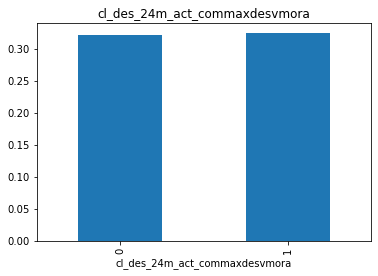

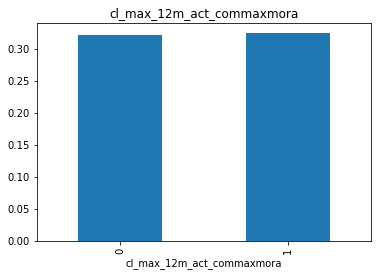

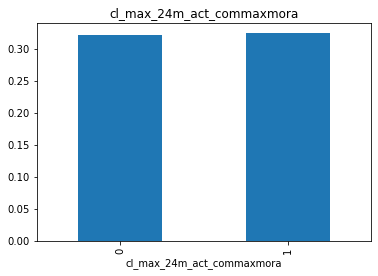

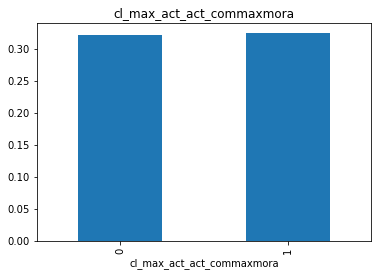

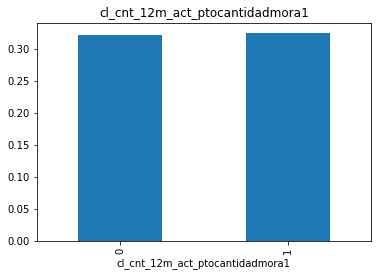

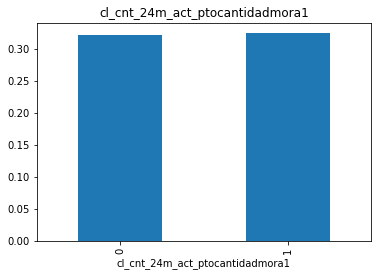

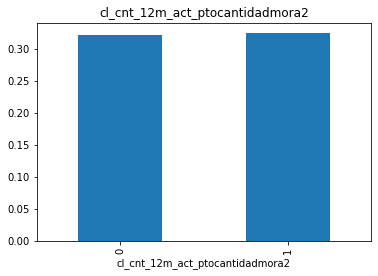

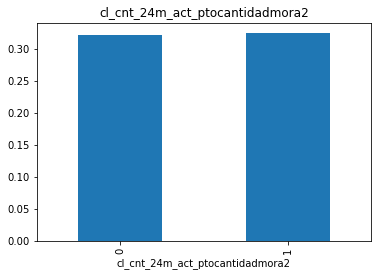

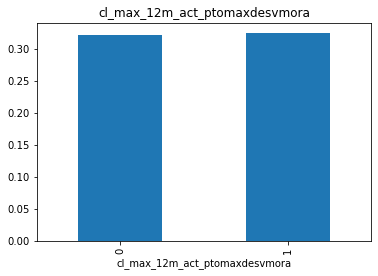

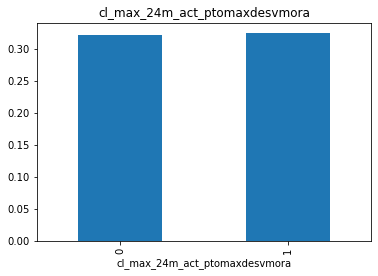

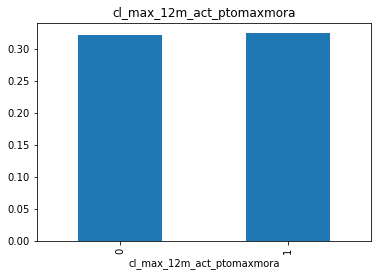

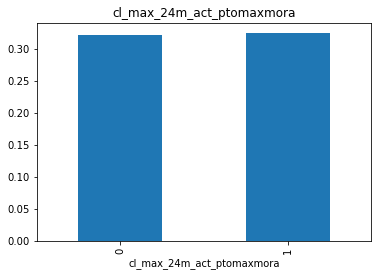

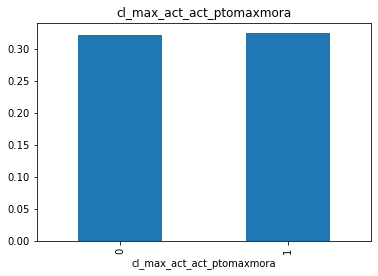

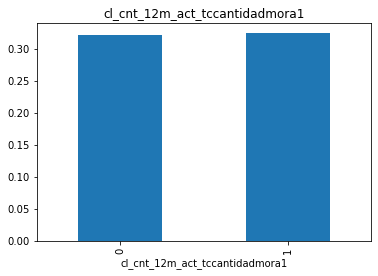

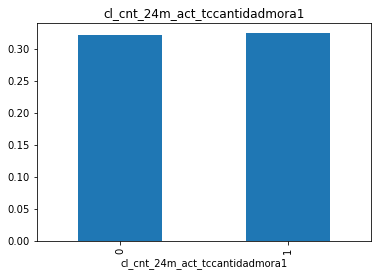

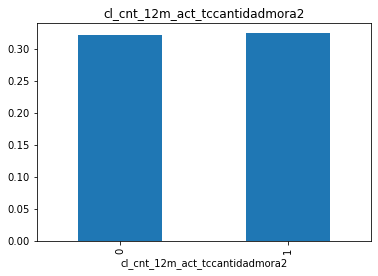

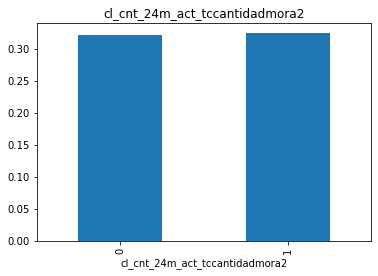

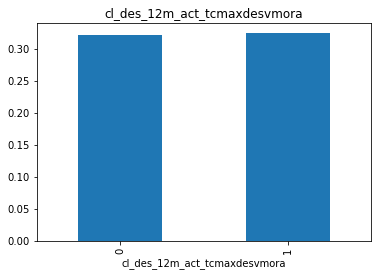

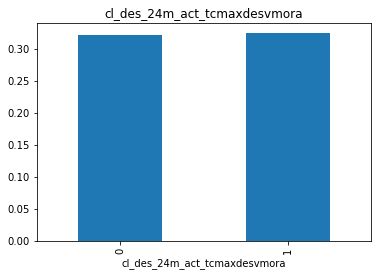

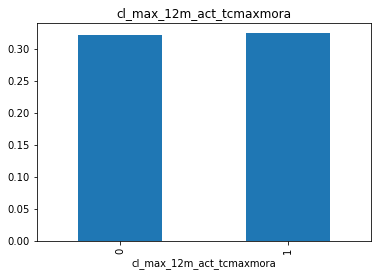

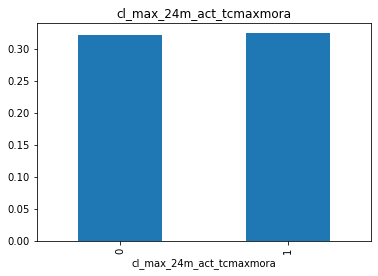

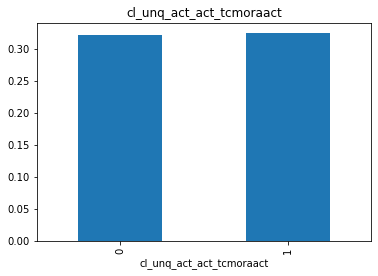

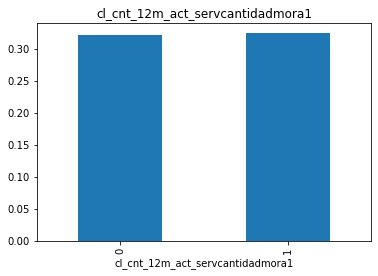

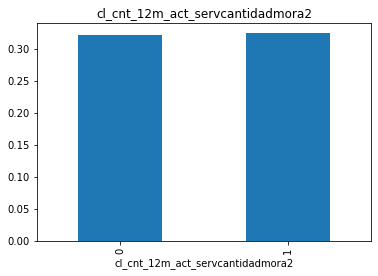

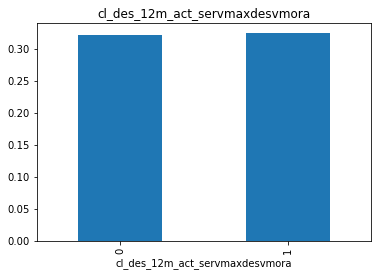

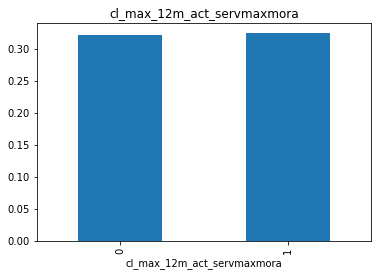

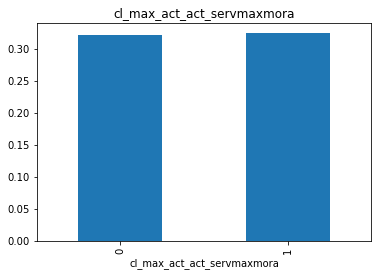

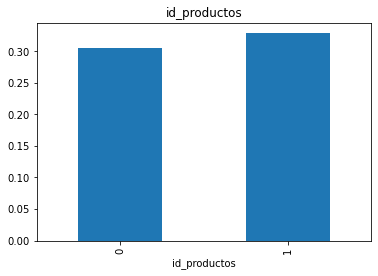

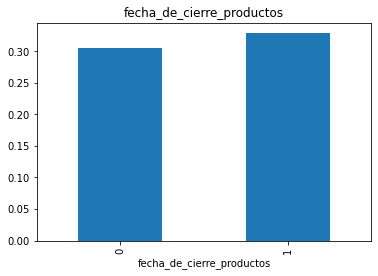

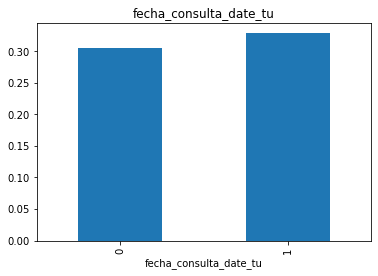

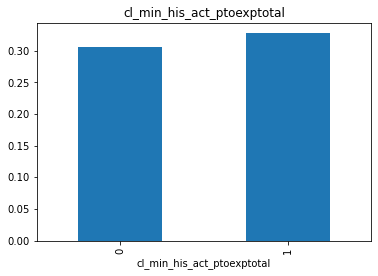

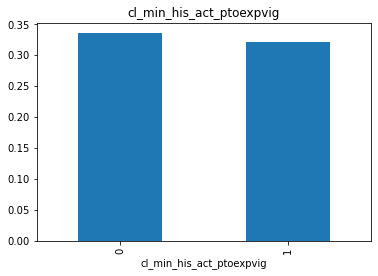

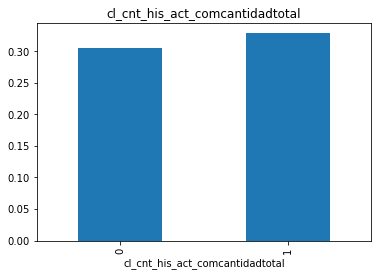

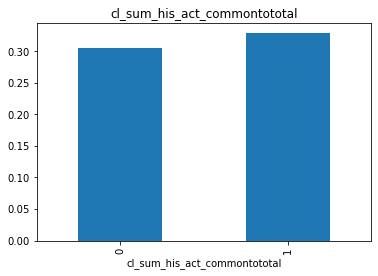

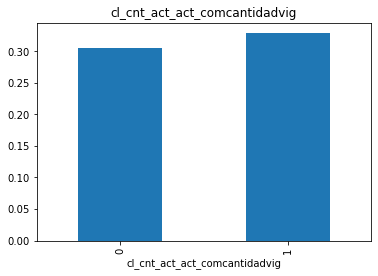

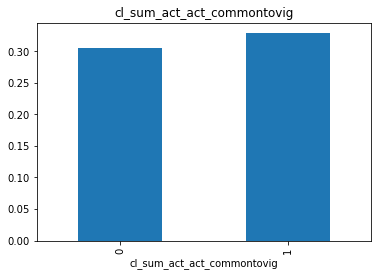

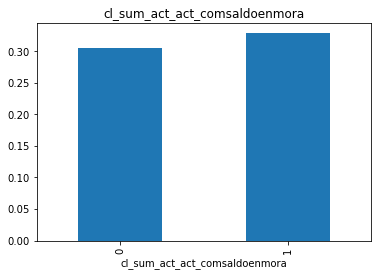

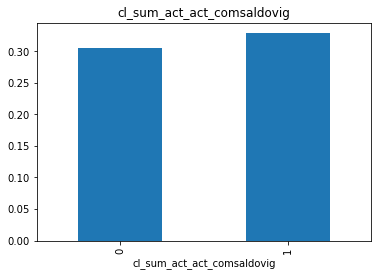

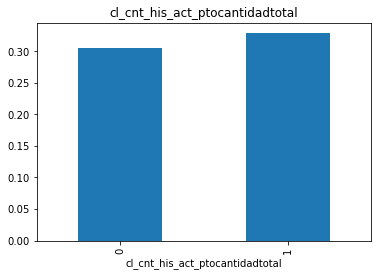

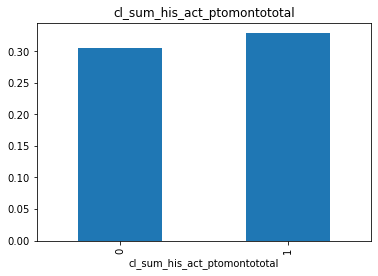

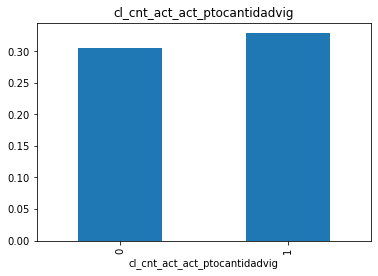

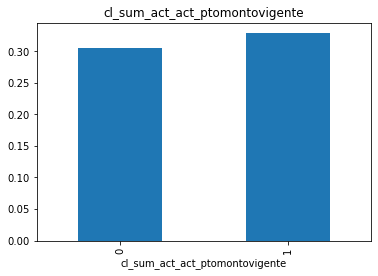

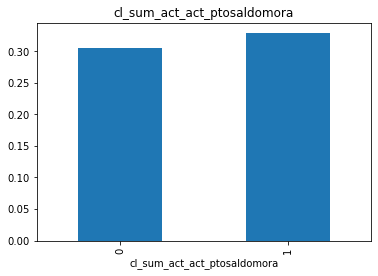

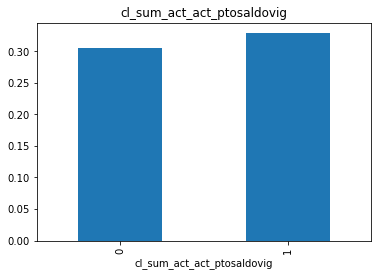

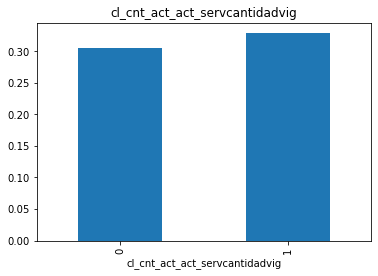

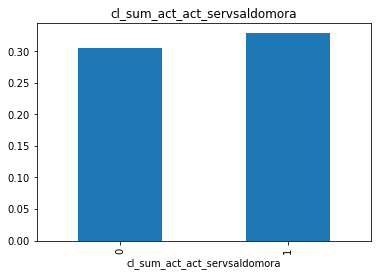

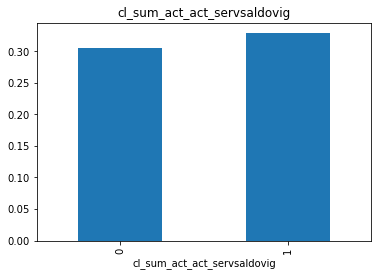

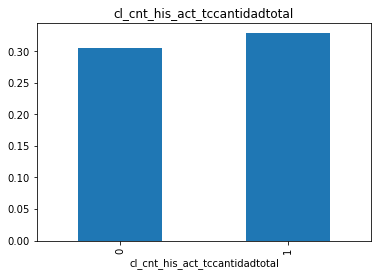

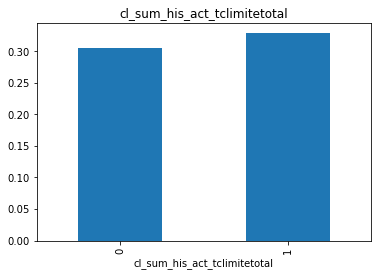

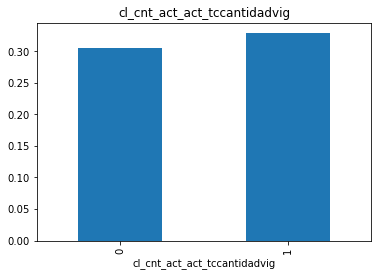

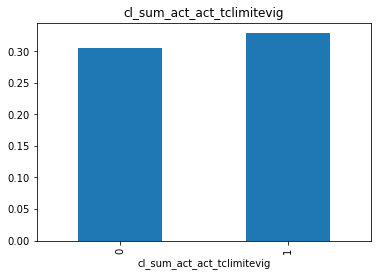

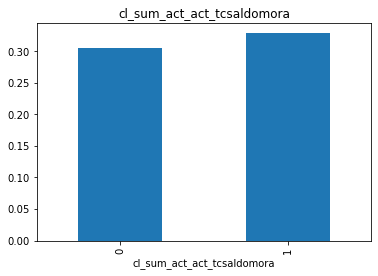

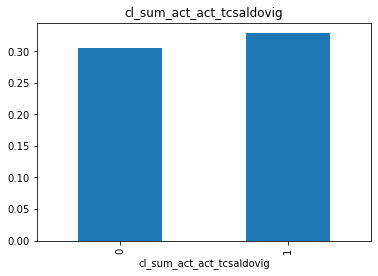

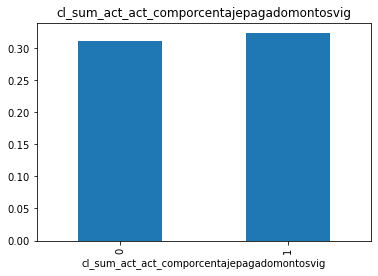

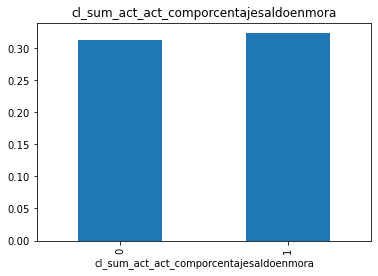

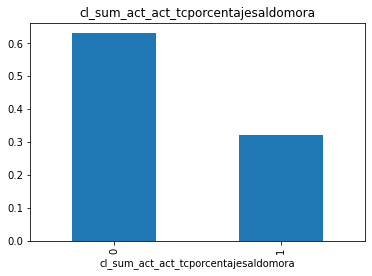

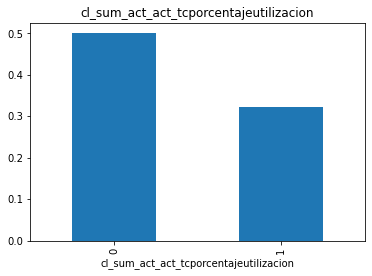

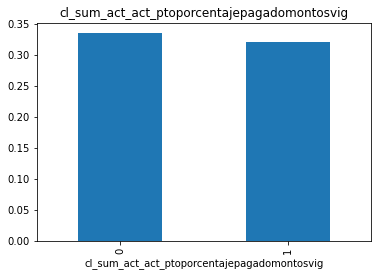

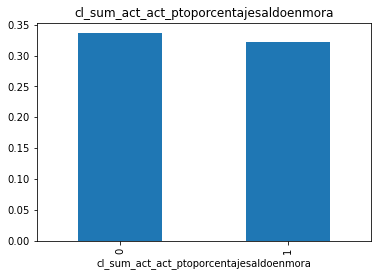

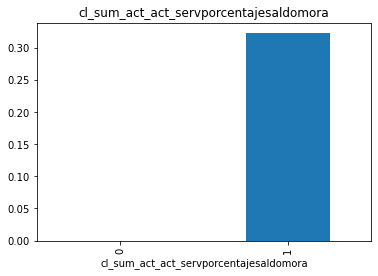

In [6]:
def analyse_na_value(df, var):

    df = df.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where a value is available

    df.groupby(var)[target_var].mean().plot.bar()

    plt.title(var)
    plt.show()


# let's run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(data, var)

The average maxmora in credits where the information is missing, differs from the average maxmora in credits where information exists. 

We will capture this information when we engineer the variables in our next notebook.

### Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [7]:
# In this dataset we have already removed sensitive id information, for example purposes we add one
#data['id_solicitud'] = data.index

In [8]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  93


,maxmora,qty_meses_desde_desembolso,dfi_solicitud_mora,dfi_solicitud_productos,cl_unq_act_act_messolicitud,cl_unq_act_act_trimestresolicitud,ide_tramite,ide_cui,cl_unq_act_act_monto,cl_unq_act_act_plazo,cl_unq_act_act_agencia,cl_unq_act_act_flagaprobado,cl_unq_act_act_longitud,cl_unq_act_act_latitud,cl_unq_act_act_personasdependientes,cl_unq_act_act_cantidadniveles,cl_unq_act_act_cantidaddormitorios,cl_unq_act_act_cantidadba_os,cl_unq_act_act_negociomontoventasefectivo,cl_unq_act_act_negociototalingresos,cl_unq_act_act_totalbienes,cl_unq_act_act_totalpasivos,cl_unq_act_act_totalgastosfam,cl_unq_act_act_totalingresosfam,cl_unq_act_act_estresventas,cl_unq_act_act_estrescostoventas,cl_unq_act_act_estresgrossprofit,cl_unq_act_act_fnacimiento_date_numberlong,cl_unq_act_act_finicionegocio_date_numberlong,id_mora,cl_cnt_12m_act_comcantidadmora1,cl_cnt_24m_act_comcantidadmora1,cl_cnt_12m_act_comcantidadmora2,cl_cnt_24m_act_comcantidadmora2,cl_des_12m_act_commaxdesvmora,cl_des_24m_act_commaxdesvmora,cl_max_12m_act_commaxmora,cl_max_24m_act_commaxmora,cl_max_act_act_commaxmora,cl_cnt_12m_act_ptocantidadmora1,cl_cnt_24m_act_ptocantidadmora1,cl_cnt_12m_act_ptocantidadmora2,cl_cnt_24m_act_ptocantidadmora2,cl_max_12m_act_ptomaxdesvmora,cl_max_24m_act_ptomaxdesvmora,cl_max_12m_act_ptomaxmora,cl_max_24m_act_ptomaxmora,cl_max_act_act_ptomaxmora,cl_cnt_12m_act_tccantidadmora1,cl_cnt_24m_act_tccantidadmora1,cl_cnt_12m_act_tccantidadmora2,cl_cnt_24m_act_tccantidadmora2,cl_des_12m_act_tcmaxdesvmora,cl_des_24m_act_tcmaxdesvmora,cl_max_12m_act_tcmaxmora,cl_max_24m_act_tcmaxmora,cl_unq_act_act_tcmoraact,cl_cnt_12m_act_servcantidadmora1,cl_cnt_12m_act_servcantidadmora2,cl_des_12m_act_servmaxdesvmora,cl_max_12m_act_servmaxmora,cl_max_act_act_servmaxmora,id_productos,cl_min_his_act_ptoexptotal,cl_min_his_act_ptoexpvig,cl_cnt_his_act_comcantidadtotal,cl_sum_his_act_commontototal,cl_cnt_act_act_comcantidadvig,cl_sum_act_act_commontovig,cl_sum_act_act_comsaldoenmora,cl_sum_act_act_comsaldovig,cl_cnt_his_act_ptocantidadtotal,cl_sum_his_act_ptomontototal,cl_cnt_act_act_ptocantidadvig,cl_sum_act_act_ptomontovigente,cl_sum_act_act_ptosaldomora,cl_sum_act_act_ptosaldovig,cl_cnt_act_act_servcantidadvig,cl_sum_act_act_servsaldomora,cl_sum_act_act_servsaldovig,cl_cnt_his_act_tccantidadtotal,cl_sum_his_act_tclimitetotal,cl_cnt_act_act_tccantidadvig,cl_sum_act_act_tclimitevig,cl_sum_act_act_tcsaldomora,cl_sum_act_act_tcsaldovig,cl_sum_act_act_comporcentajepagadomontosvig,cl_sum_act_act_comporcentajesaldoenmora,cl_sum_act_act_tcporcentajesaldomora,cl_sum_act_act_tcporcentajeutilizacion,cl_sum_act_act_ptoporcentajepagadomontosvig,cl_sum_act_act_ptoporcentajesaldoenmora,cl_sum_act_act_servporcentajesaldomora
0,1,4,NaN,NaN,9,3,3812915.0,2854833582101,15000.0,18.0,NaN,1,-89.983806,14.634083,1.0,1.0,4.0,1.0,11500.0,14500.0,70000.0,0.0,1050.0,3300.0,45000.00,22784.81,22215.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,NaN,-3.0,9,3,3813215.0,1708484931901,3500.0,18.0,NaN,1,-89.531098,14.973288,2.0,1.0,3.0,1.0,10000.0,10000.0,32300.0,0.0,1310.0,NaN,9750.00,0.00,9750.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.708485e+12,13.700000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,4,-3.0,-3.0,9,3,3813623.0,1990916842102,6000.0,12.0,NaN,1,-89.849669,14.664392,1.0,1.0,3.0,1.0,8000.0,8000.0,96800.0,0.0,800.0,0.0,19249.95,8095.77,11154.18,NaN,NaN,1.990917e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.276385,0.199826,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.990917e+12,3.866667,8.3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,40380.489990,2.0,11119.0,0.0,11743.0,

From the above view of the dataset, we notice the variable Id, which is an indicator of the credit. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each credit in the dataset. See below:

In [9]:
for id in identifier:
    print(id)
    print('Number of solicitud Id labels: ', len(data[id].unique()))
print('Number of soliciutd in the Dataset: ', len(data))

ide_tramite
Number of solicitud Id labels:  27560
ide_cui
Number of solicitud Id labels:  27132
id_credito
Number of solicitud Id labels:  27558
id_solicitud
Number of solicitud Id labels:  27560
id_tramite
Number of solicitud Id labels:  27560
Number of soliciutd in the Dataset:  27638


#### Temporal variables

We have 4 year variables in the dataset:

- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold.

In [10]:
# list of variables that contain year information

date_like_names = ['dia','mes','anio','date','year','fecha']
date_like_names = '|'.join(date_like_names)

date_vars = list(data.filter(regex=date_like_names).columns)

In [11]:
# let's explore the values of these temporal variables

for var in date_vars:
    print(var, data[var].unique())
    print()

qty_meses_desde_desembolso [4 3 2 1]

cl_unq_act_act_messolicitud [ 9 10 11 12]

cl_unq_act_act_trimestresolicitud [3 4]

cl_unq_act_act_fechasolicitud ['2020-09-03 00:00:00' '2020-09-04 00:00:00' '2020-09-05 00:00:00'
 '2020-09-06 00:00:00' '2020-09-07 00:00:00' '2020-10-01 00:00:00'
 '2020-09-08 00:00:00' '2020-09-09 00:00:00' '2020-09-10 00:00:00'
 '2020-09-11 00:00:00' '2020-09-12 00:00:00' '2020-09-14 00:00:00'
 '2020-09-13 00:00:00' '2020-09-15 00:00:00' '2020-09-16 00:00:00'
 '2020-09-18 00:00:00' '2020-09-17 00:00:00' '2020-09-19 00:00:00'
 '2020-09-20 00:00:00' '2020-09-21 00:00:00' '2020-09-22 00:00:00'
 '2020-09-23 00:00:00' '2020-09-24 00:00:00' '2020-09-25 00:00:00'
 '2020-09-26 00:00:00' '2020-09-27 00:00:00' '2020-09-28 00:00:00'
 '2020-09-29 00:00:00' '2020-09-30 00:00:00' '2020-10-02 00:00:00'
 '2020-10-05 00:00:00' '2020-10-03 00:00:00' '2020-10-04 00:00:00'
 '2020-10-06 00:00:00' '2020-10-24 00:00:00' '2020-10-16 00:00:00'
 '2020-10-12 00:00:00' '2020-10-13 00:00:00'

As expected, the values are full dates or integer months.

We can explore the evolution of the maxmora with the dates in which the credit request started:

In [12]:
compareVar = 'lastDate'

In [13]:
explore = 'cl_unq_act_act_fechasolicitud'

In [14]:
data[explore] = pd.to_datetime(data[explore])

In [15]:
data[compareVar] = pd.to_datetime('today') #data[explore].max()

In [16]:
data[compareVar] - data[explore]

0       158 days 22:18:23.015718
1       158 days 22:18:23.015718
2       158 days 22:18:23.015718
3       158 days 22:18:23.015718
4       158 days 22:18:23.015718
                  ...           
27633    40 days 22:18:23.015718
27634    40 days 22:18:23.015718
27635    40 days 22:18:23.015718
27636    40 days 22:18:23.015718
27637    40 days 22:18:23.015718
Length: 27638, dtype: timedelta64[ns]

Text(0.5, 1.0, 'Date of credit request')

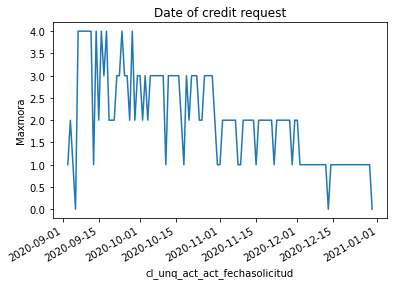

In [17]:
data.groupby(explore)[target_var].max().plot()
plt.ylabel('Maxmora')
plt.title('Date of credit request')

There is no direct relation between date of credit request and max mora. That is expected, as max mora shouldn't be related to a the time credit was requested. Perhaps there would be a relation expected on increasing due payments during pandemic.


Let's go ahead and explore whether there is a relationship between the requested ammount and incomes ammount. For this, we will capture the ratio between the credit ammount requested and incomes:

In [18]:
income_var = ['cl_unq_act_act_totalgastosfam', 'cl_unq_act_act_negociototalingresos', 'cl_unq_act_act_totalbienes']
compareVar = 'cl_unq_act_act_monto'

cl_unq_act_act_totalgastosfam


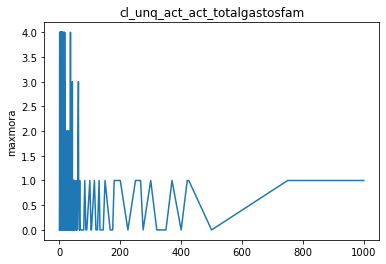

cl_unq_act_act_negociototalingresos


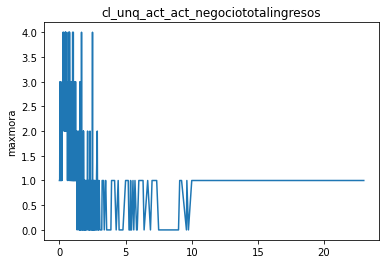

cl_unq_act_act_totalbienes


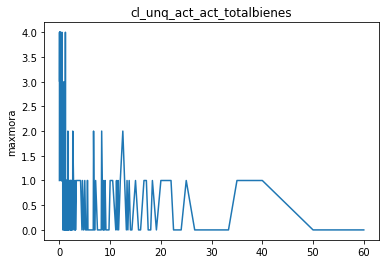

In [19]:
# let's explore the relationship between income ammounts
# and the house price in a bit of more detail:

def analyse_income_vars(df, var):
    df = df.copy()
    
    # capture ratio between requested ammount and income variable
    # for each credit
    data.groupby(round(data[compareVar]/data[var],2))[target_var].max().plot()
    print(var)
    plt.ylabel(target_var)
    plt.title(var)
    plt.show()
    
    
for var in income_var:
    if var !=target_var:
        analyse_income_vars(data, var)
    

There seems to be a strong relation between incomes and requested ammount, particularely totalbienes.

Which makes sense, people with more assets tend to be good investors and make more assets out of good investments.

#### Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [20]:
income_var.append(compareVar)

In [21]:
for var in income_var:
    data[income_var] = data[income_var] + 1

In [22]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in date_vars+income_var+[identifier]]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  42


In [23]:
# let's visualise the discrete variables

data[discrete_vars].head()

,maxmora,cl_unq_act_act_agencia,cl_unq_act_act_flagaprobado,cl_unq_act_act_cantidadniveles,cl_cnt_12m_act_comcantidadmora1,cl_cnt_24m_act_comcantidadmora1,cl_cnt_12m_act_comcantidadmora2,cl_cnt_24m_act_comcantidadmora2,cl_max_12m_act_commaxmora,cl_max_24m_act_commaxmora,cl_max_act_act_commaxmora,cl_cnt_12m_act_ptocantidadmora1,cl_cnt_24m_act_ptocantidadmora1,cl_cnt_12m_act_ptocantidadmora2,cl_cnt_24m_act_ptocantidadmora2,cl_max_12m_act_ptomaxmora,cl_max_24m_act_ptomaxmora,cl_max_act_act_ptomaxmora,cl_cnt_12m_act_tccantidadmora1,cl_cnt_24m_act_tccantidadmora1,cl_cnt_12m_act_tccantidadmora2,cl_cnt_24m_act_tccantidadmora2,cl_des_12m_act_tcmaxdesvmora,cl_des_24m_act_tcmaxdesvmora,cl_max_12m_act_tcmaxmora,cl_max_24m_act_tcmaxmora,cl_unq_act_act_tcmoraact,cl_cnt_12m_act_servcantidadmora1,cl_cnt_12m_act_servcantidadmora2,cl_des_12m_act_servmaxdesvmora,cl_max_12m_act_servmaxmora,cl_max_act_act_servmaxmora,cl_cnt_act_act_comcantidadvig,cl_cnt_act_act_ptocantidadvig,cl_cnt_act_act_servcantidadvig,cl_sum_act_act_servsaldomora,cl_sum_act_act_servsaldovig,cl_cnt_his_act_tccantidadtotal,cl_cnt_act_act_tccantidadvig,cl_sum_act_act_tcsaldomora,cl_sum_act_act_tcporcentajesaldomora,cl_sum_act_act_servporcentajesaldomora
0,1,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,1,NaN,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,1,NaN,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These discrete variables tend to be qualifications or grading scales, or refer to the number of rooms, or units.

Let's go ahead and analyse their contribution to the maxmora.

In [24]:
len(data.groupby('cl_unq_act_act_agencia')[target_var].mean())

0

maxmora


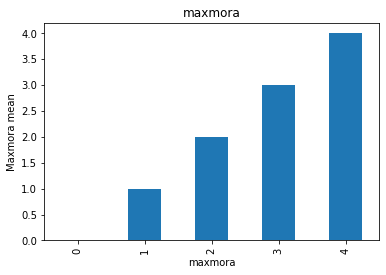

cl_unq_act_act_agencia
cl_unq_act_act_flagaprobado


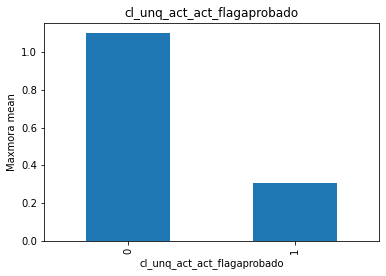

cl_unq_act_act_cantidadniveles


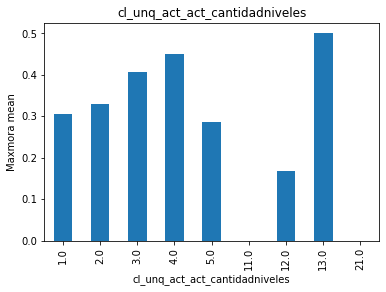

cl_cnt_12m_act_comcantidadmora1


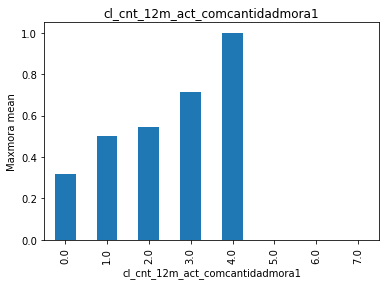

cl_cnt_24m_act_comcantidadmora1


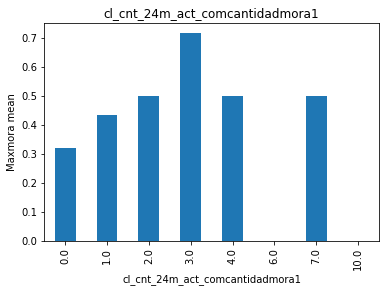

cl_cnt_12m_act_comcantidadmora2


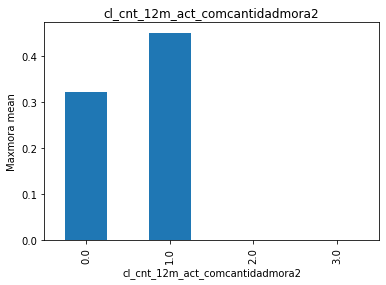

cl_cnt_24m_act_comcantidadmora2


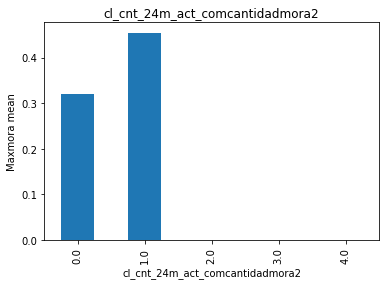

cl_max_12m_act_commaxmora


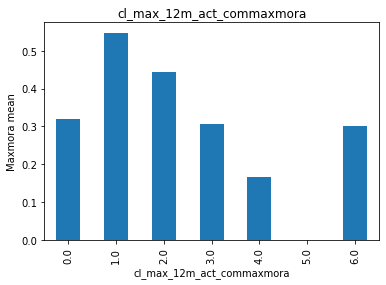

cl_max_24m_act_commaxmora


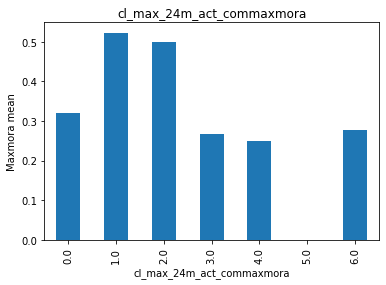

cl_max_act_act_commaxmora


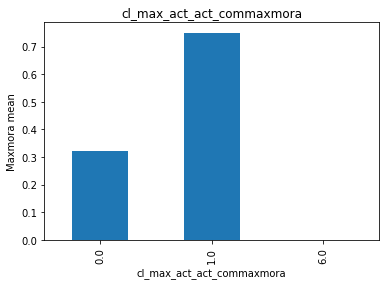

cl_cnt_12m_act_ptocantidadmora1


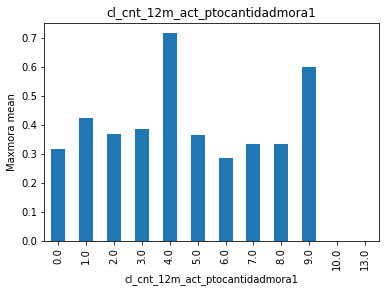

cl_cnt_24m_act_ptocantidadmora1


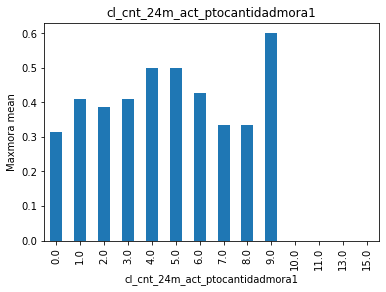

cl_cnt_12m_act_ptocantidadmora2


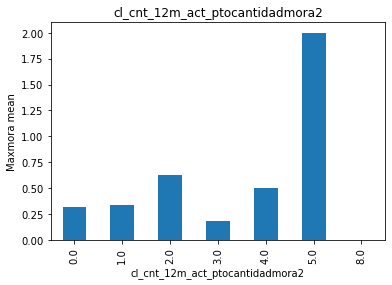

cl_cnt_24m_act_ptocantidadmora2


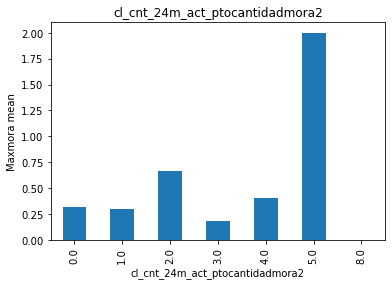

cl_max_12m_act_ptomaxmora


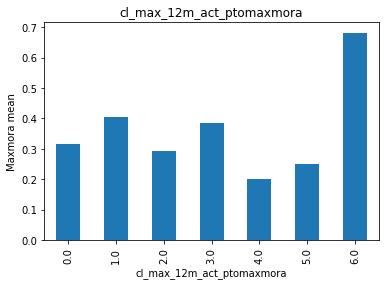

cl_max_24m_act_ptomaxmora


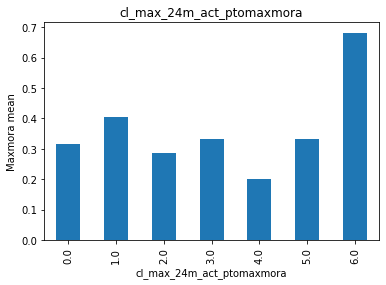

cl_max_act_act_ptomaxmora


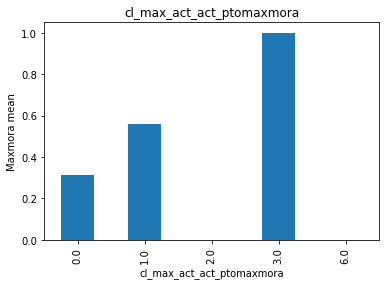

cl_cnt_12m_act_tccantidadmora1


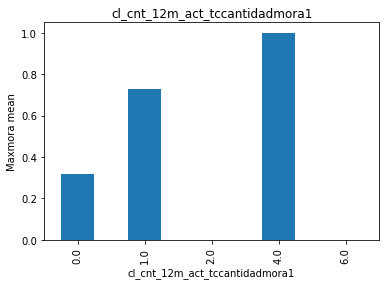

cl_cnt_24m_act_tccantidadmora1


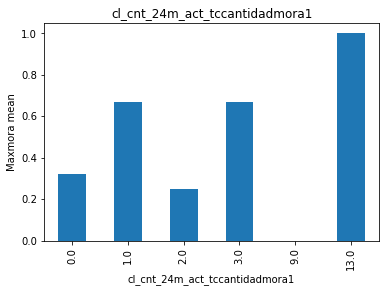

cl_cnt_12m_act_tccantidadmora2


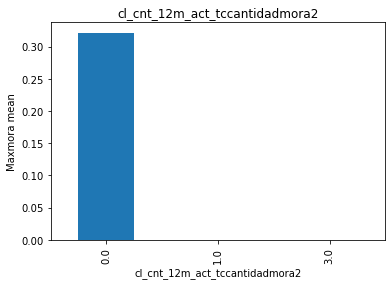

cl_cnt_24m_act_tccantidadmora2


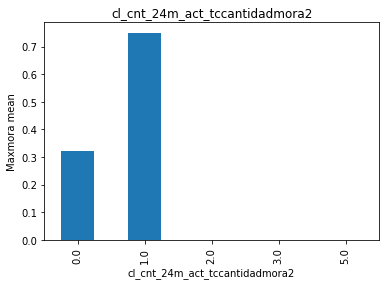

cl_des_12m_act_tcmaxdesvmora


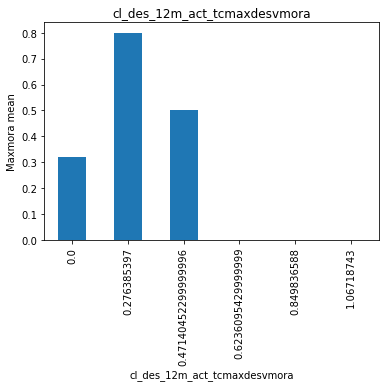

cl_des_24m_act_tcmaxdesvmora


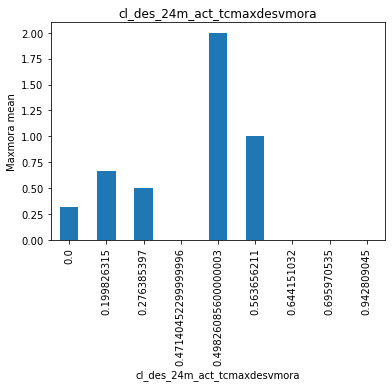

cl_max_12m_act_tcmaxmora


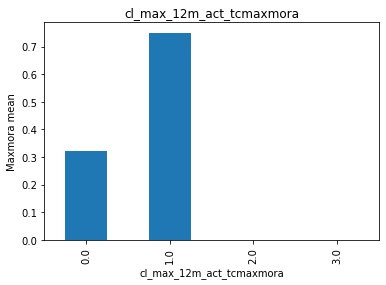

cl_max_24m_act_tcmaxmora


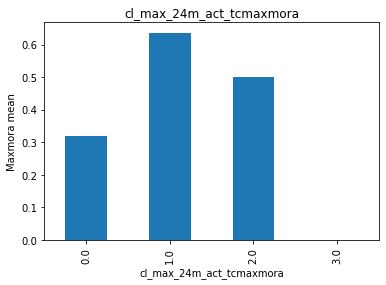

cl_unq_act_act_tcmoraact


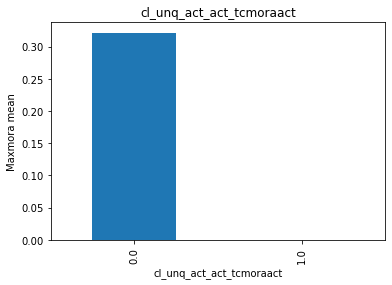

cl_cnt_12m_act_servcantidadmora1


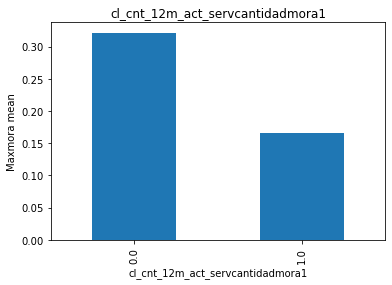

cl_cnt_12m_act_servcantidadmora2


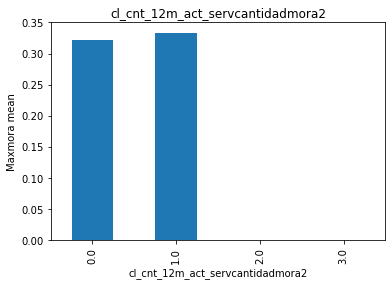

cl_des_12m_act_servmaxdesvmora


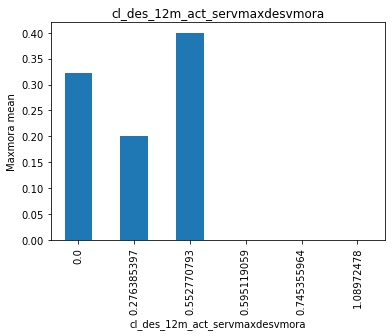

cl_max_12m_act_servmaxmora


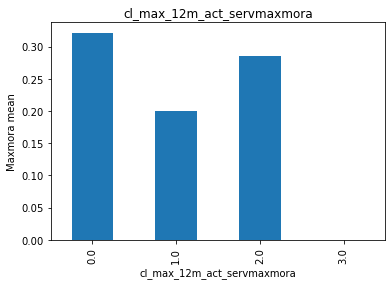

cl_max_act_act_servmaxmora


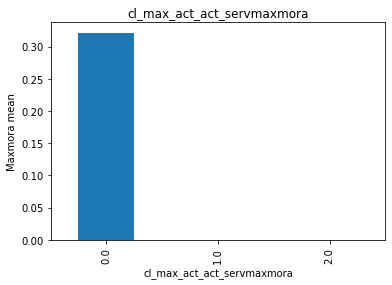

cl_cnt_act_act_comcantidadvig


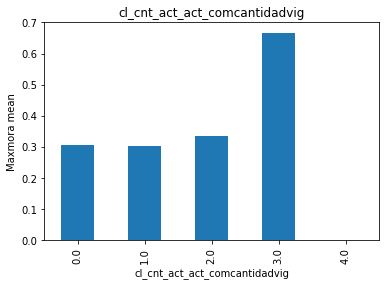

cl_cnt_act_act_ptocantidadvig


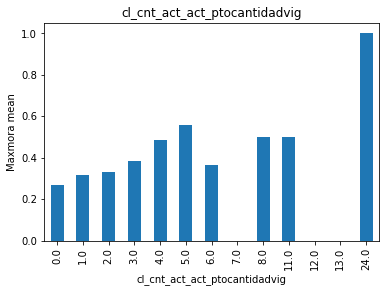

cl_cnt_act_act_servcantidadvig


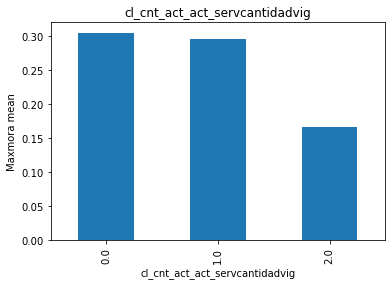

cl_sum_act_act_servsaldomora


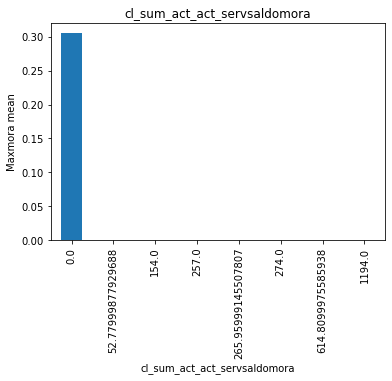

cl_sum_act_act_servsaldovig


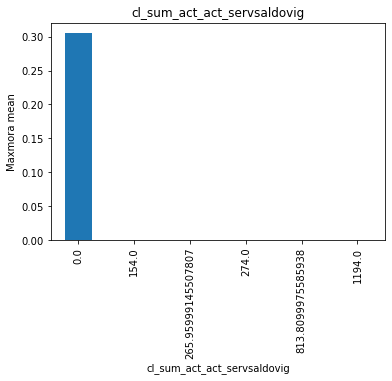

cl_cnt_his_act_tccantidadtotal


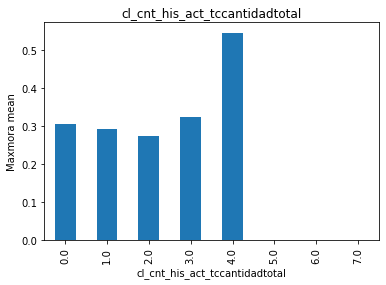

cl_cnt_act_act_tccantidadvig


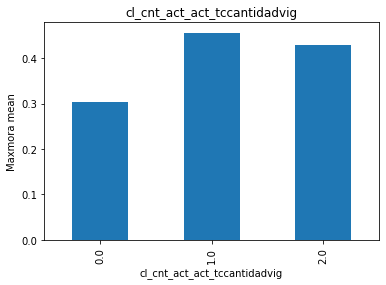

cl_sum_act_act_tcsaldomora


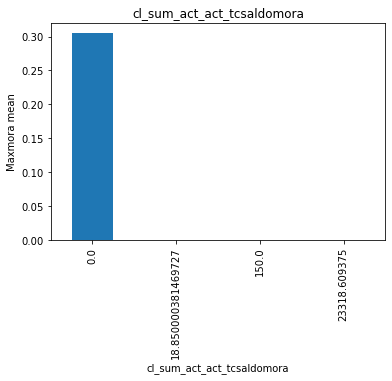

cl_sum_act_act_tcporcentajesaldomora


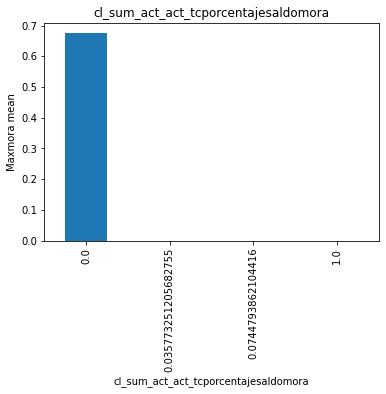

cl_sum_act_act_servporcentajesaldomora


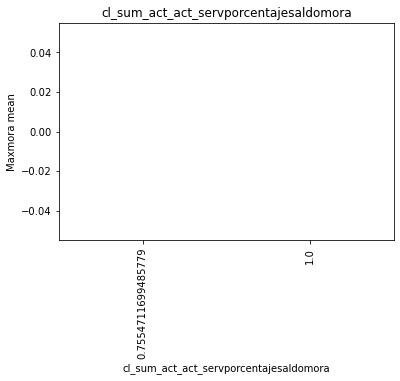

In [25]:
def analyse_discrete(df, var):
    print(var)
    df = df.copy()
    df = df.groupby(var)[target_var].mean()
    if(len(df)>0):
        df = df.plot.bar()
        plt.title(var)
        plt.ylabel('Maxmora mean')
        plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

There tend to be a relationship between the variables values and the maxMora, but this relationship is not always monotonic. 

For example, for servcantidadvig, there is a monotonic relationship: the lower the value, the higher the maxMora.  

However, for cantidadvig, ptomaxmora, comcantidadmora1 and cantidadmora2, the relationship is monotonic. Clearly, some Condition grades, like 5, correlate with higher maxmoras, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract maximum value for a linear model.

There are ways to re-arrange the order of the discrete values of a variable, to create a monotonic relationship between the variable and the target. DataScientist should go deep into this Feature Engineering.

#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete variables in our dataset.

In [26]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+date_vars+[identifier]]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  46


In [27]:
# let's visualise the continuous variables

data[cont_vars].head()

,dfi_solicitud_mora,dfi_solicitud_productos,ide_tramite,ide_cui,cl_unq_act_act_monto,cl_unq_act_act_plazo,cl_unq_act_act_longitud,cl_unq_act_act_latitud,cl_unq_act_act_personasdependientes,cl_unq_act_act_cantidaddormitorios,cl_unq_act_act_cantidadba_os,cl_unq_act_act_negociomontoventasefectivo,cl_unq_act_act_negociototalingresos,cl_unq_act_act_totalbienes,cl_unq_act_act_totalpasivos,cl_unq_act_act_totalgastosfam,cl_unq_act_act_totalingresosfam,cl_unq_act_act_estresventas,cl_unq_act_act_estrescostoventas,cl_unq_act_act_estresgrossprofit,id_mora,cl_des_12m_act_commaxdesvmora,cl_des_24m_act_commaxdesvmora,cl_max_12m_act_ptomaxdesvmora,cl_max_24m_act_ptomaxdesvmora,id_productos,cl_min_his_act_ptoexptotal,cl_min_his_act_ptoexpvig,cl_cnt_his_act_comcantidadtotal,cl_sum_his_act_commontototal,cl_sum_act_act_commontovig,cl_sum_act_act_comsaldoenmora,cl_sum_act_act_comsaldovig,cl_cnt_his_act_ptocantidadtotal,cl_sum_his_act_ptomontototal,cl_sum_act_act_ptomontovigente,cl_sum_act_act_ptosaldomora,cl_sum_act_act_ptosaldovig,cl_sum_his_act_tclimitetotal,cl_sum_act_act_tclimitevig,cl_sum_act_act_tcsaldovig,cl_sum_act_act_comporcentajepagadomontosvig,cl_sum_act_act_comporcentajesaldoenmora,cl_sum_act_act_tcporcentajeutilizacion,cl_sum_act_act_ptoporcentajepagadomontosvig,cl_sum_act_act_ptoporcentajesaldoenmora
0,NaN,NaN,3812915.0,2854833582101,15004.0,18.0,-89.983806,14.634083,1.0,4.0,1.0,11500.0,14504.0,70004.0,0.0,1054.0,3300.0,45000.00,22784.81,22215.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-3.0,3813215.0,1708484931901,3504.0,18.0,-89.531098,14.973288,2.0,3.0,1.0,10000.0,10004.0,32304.0,0.0,1314.0,NaN,9750.00,0.00,9750.00,NaN,NaN,NaN,NaN,NaN,1.708485e+12,13.700000,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,-3.0,-3.0,3813623.0,1990916842102,6004.0,12.0,-89.849669,14.664392,1.0,3.0,1.0,8000.0,8004.0,96804.0,0.0,804.0,0.0,19249.95,8095.77,11154.18,1.990917e+12,0.0,0.0,0.276385,0.199826,1.990917e+12,3.866667,8.3,0.0,0.0,0.0,0.0,0.0,11.0,40380.489990,11119.0,0.0,11743.0,0.0,0.0,0.0,NaN,NaN,NaN,1.05612,0.0
3,-3.0,-3.0,3813896.0,1725963271901,4504.0,18.0,-89.592973,15.038320,1.0,3.0,1.0,13000.0,13004.0,45204.0,0.0,1599.0,NaN,18000.00,0.00,18000.00,1.725963e+12,0.0,0.0,0.000000,0.000000,1.725963e+12,34.833332,NaN,0.0,0.0,0.0,0.0,0.0,1.0,29296.869141,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3814047.0,1919782800205,2004.0,12.0,-1.000000,-1.000000,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


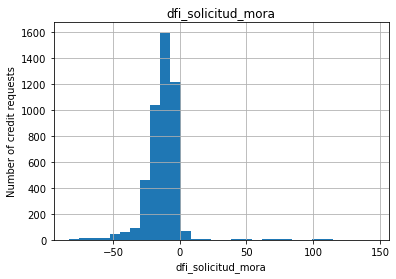

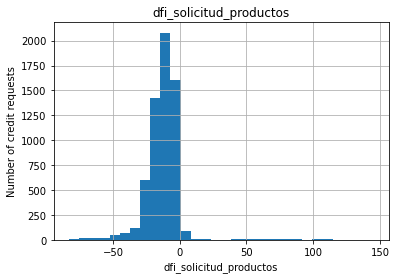

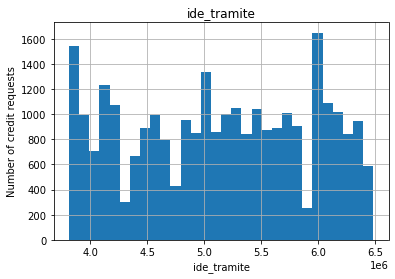

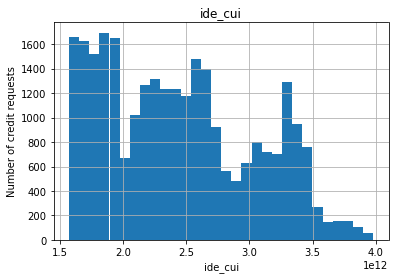

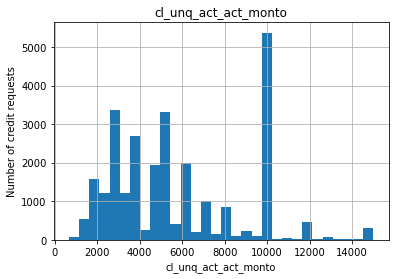

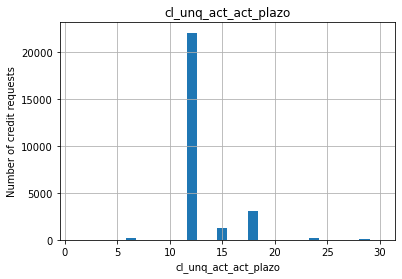

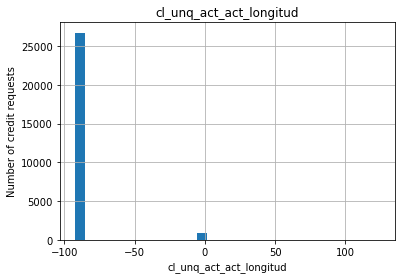

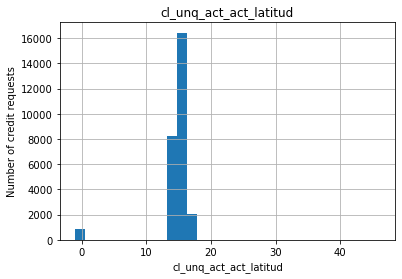

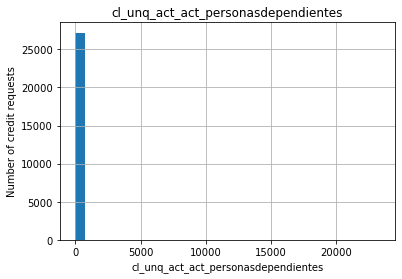

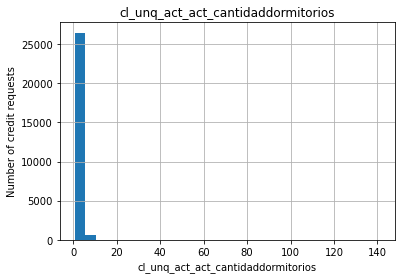

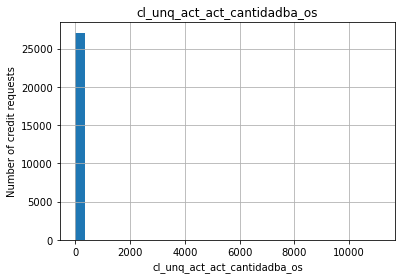

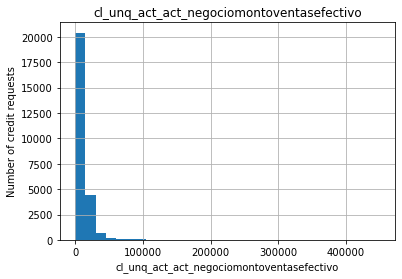

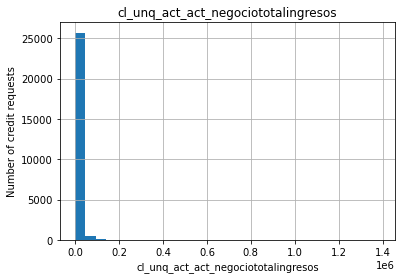

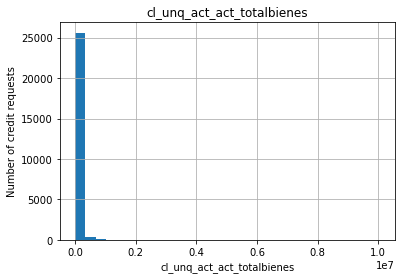

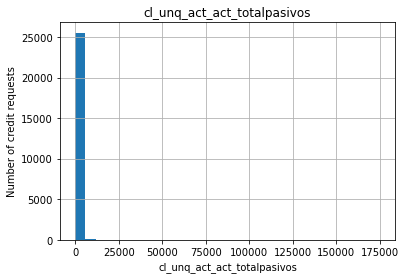

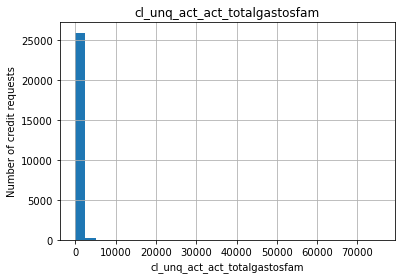

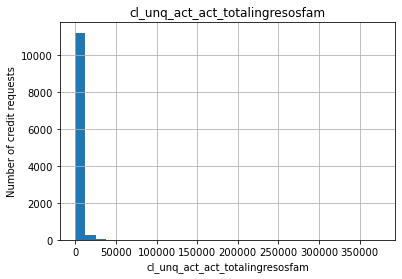

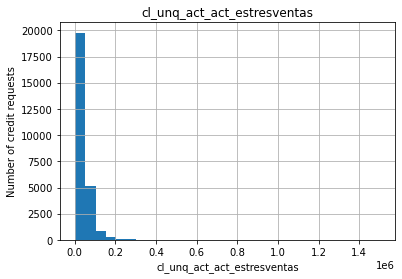

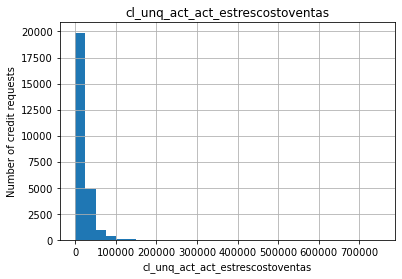

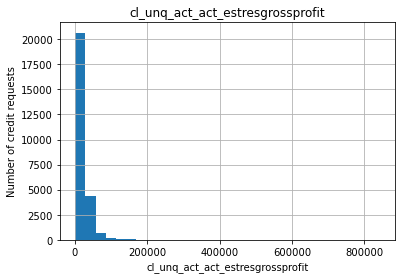

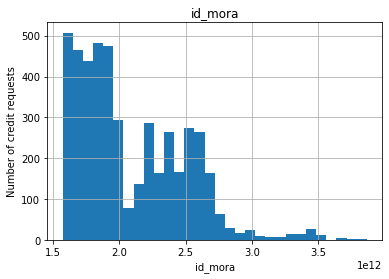

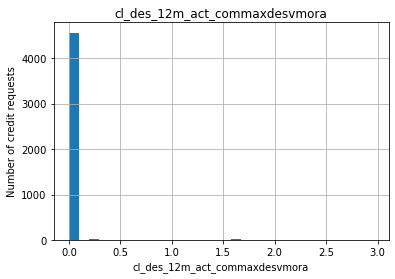

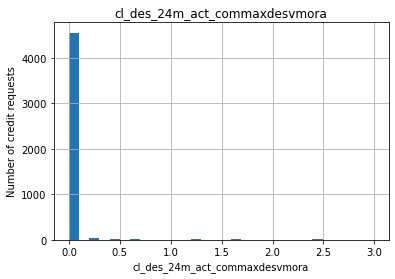

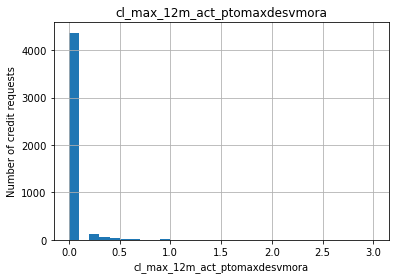

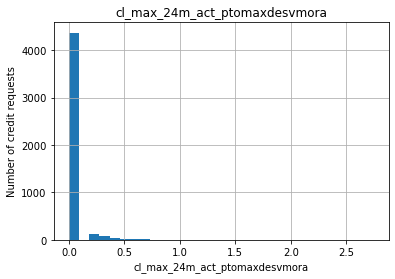

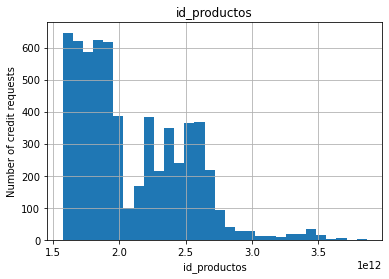

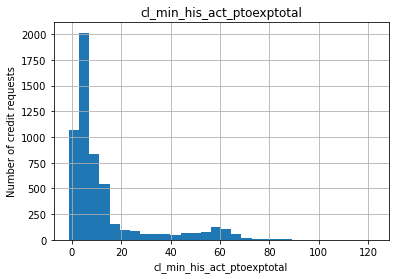

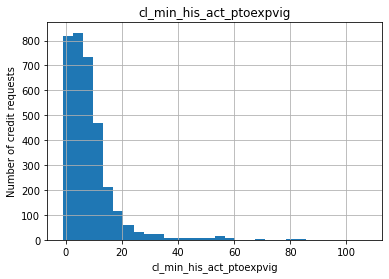

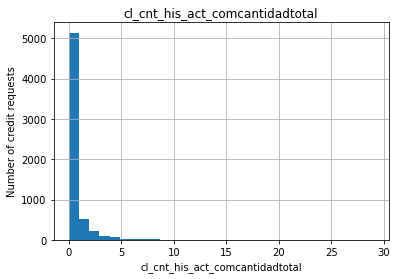

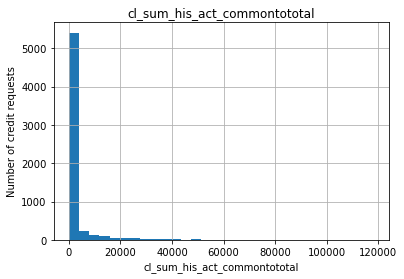

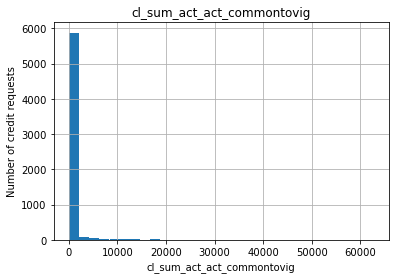

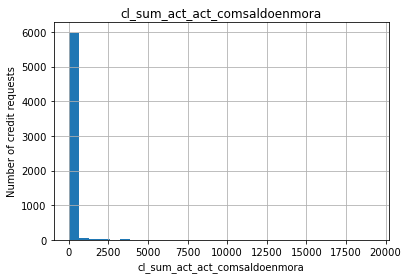

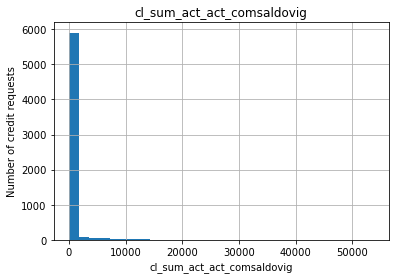

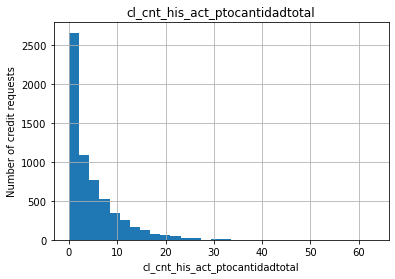

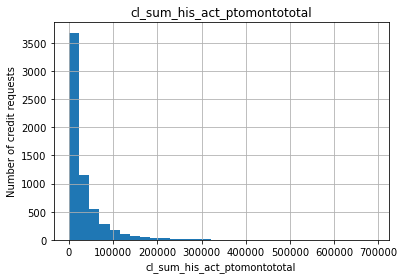

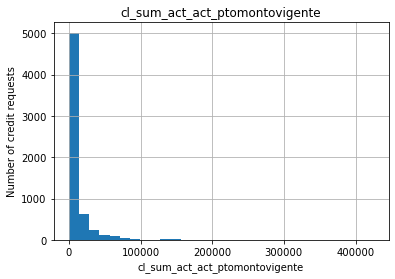

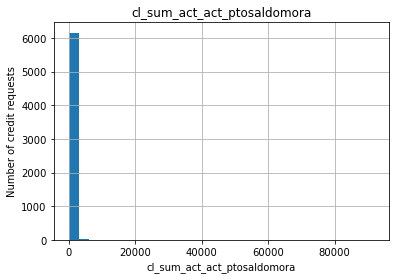

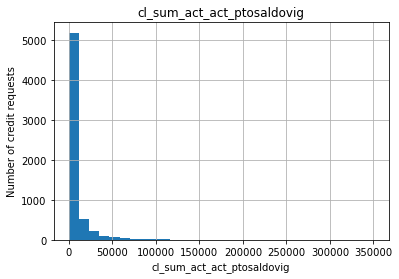

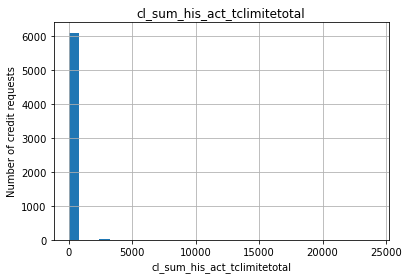

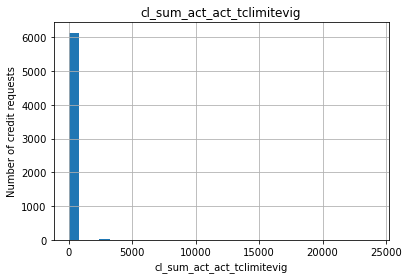

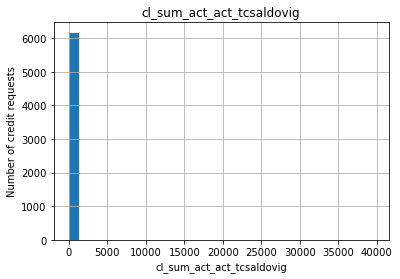

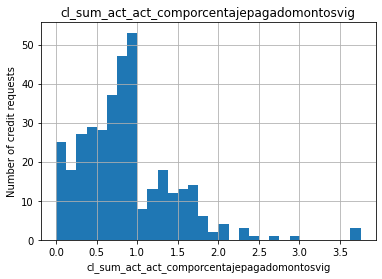

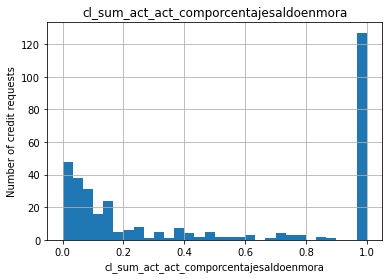

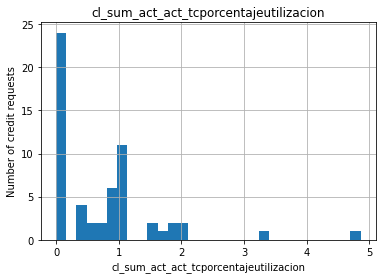

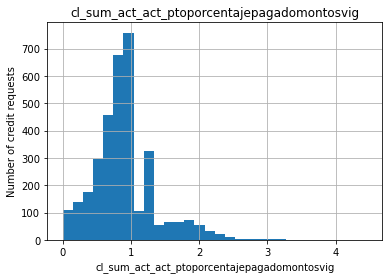

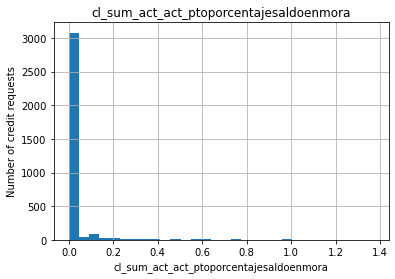

In [28]:
# Let's go ahead and analyse the distributions of these variables


def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of credit requests')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_continuous(data, var)

The variables are not normally distributed. 

Sometimes, transforming the variables to improve the value spread, improves the model performance. Thus, we will transform our variables in the next notebook, feature engineering step.

Let's evaluate if a logarithmic transformation of the variables returns values that follow a normal distribution:

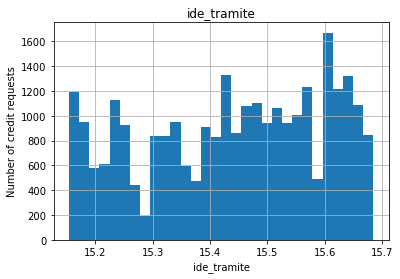

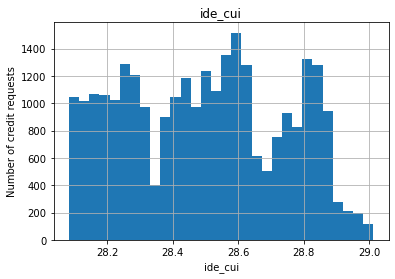

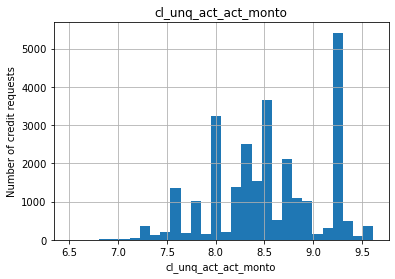

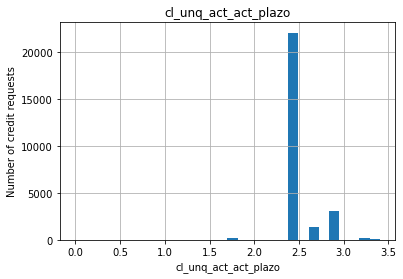

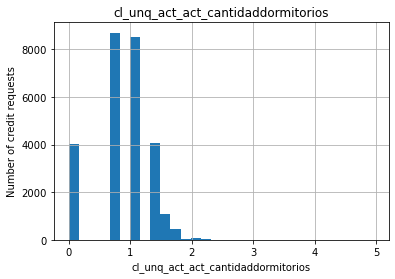

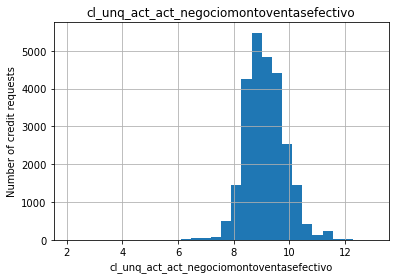

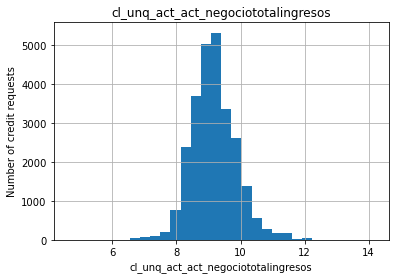

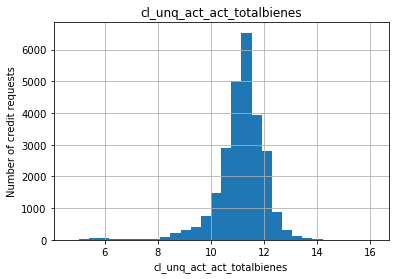

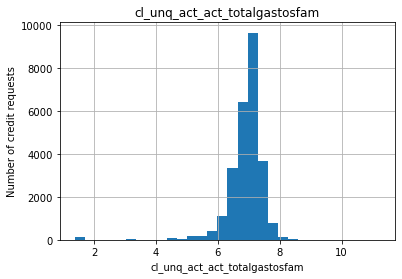

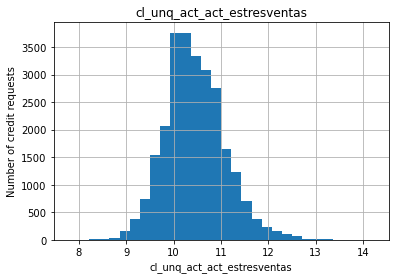

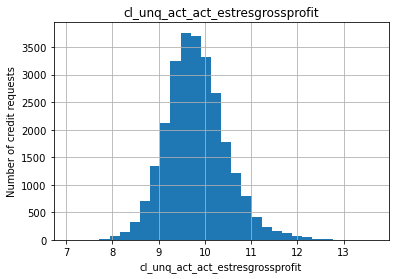

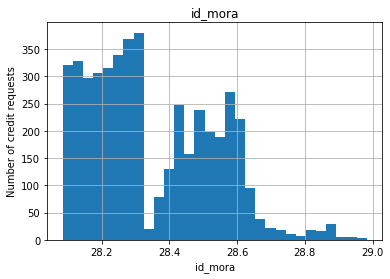

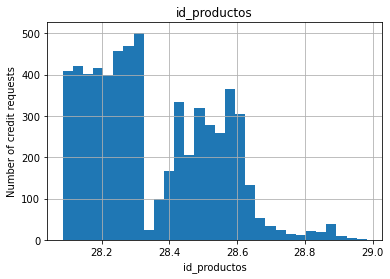

In [29]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation


def analyse_transformed_continuous(df, var):
    df = df.copy()

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of credit requests')
        plt.xlabel(var)
        plt.title(var)
        plt.show()


for var in cont_vars:
    analyse_transformed_continuous(data, var)

We get a better spread of the values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


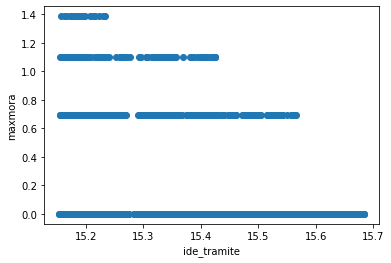

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


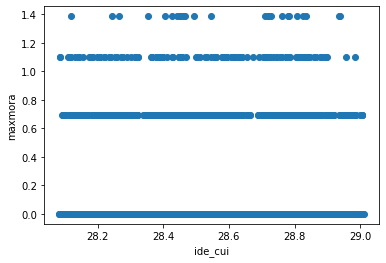

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


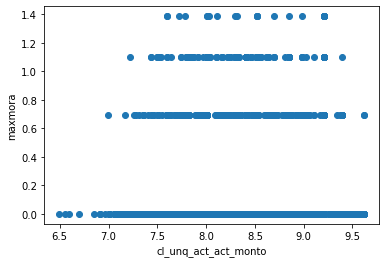

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


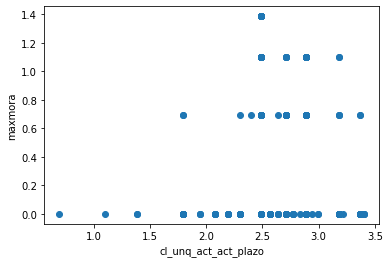

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


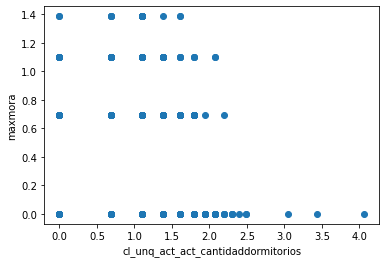

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


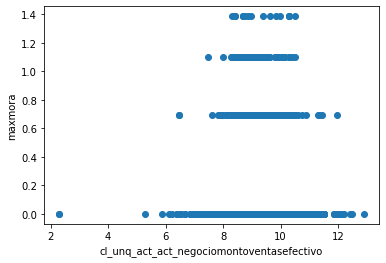

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


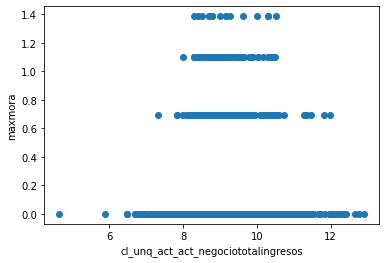

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


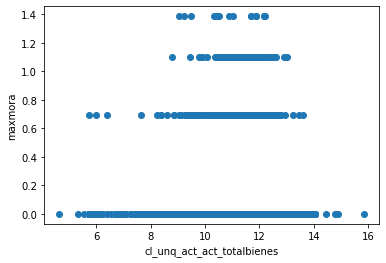

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


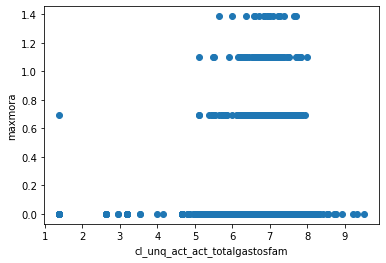

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


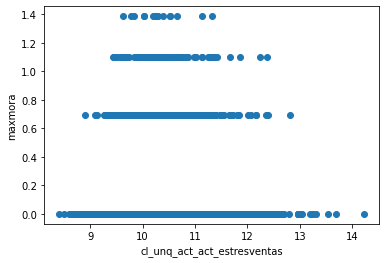

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


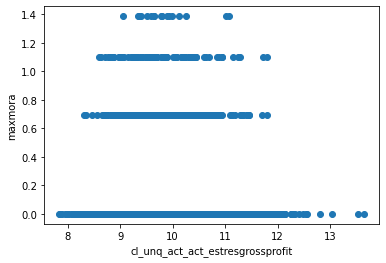

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


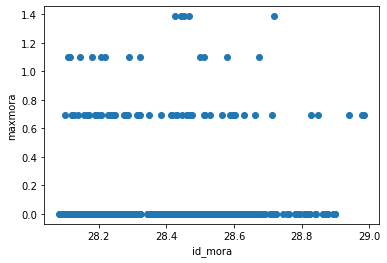

C:\Users\zeus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


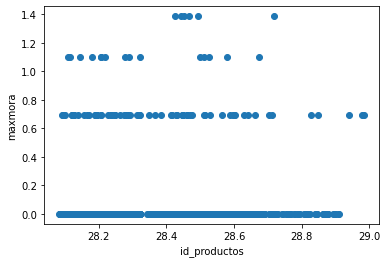

In [30]:
# let's explore the relationship between the maxmora and
# the transformed variables with more detail:


def transform_analyse_continuous(df, var):
    df = df.copy()

    # log does not take negative values, so let's be careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        
        # log transform the target (remember it was also skewed)
        df[target_var] = np.log(df[target_var])
        
        # plot
        plt.scatter(df[var], df[target_var])
        plt.ylabel(target_var)
        plt.xlabel(var)
        plt.show()


for var in cont_vars:
    if var != target_var:
        transform_analyse_continuous(data, var)

From the previous plots, we observe some monotonic associations between maxmora and the variables to which we applied the log transformation, for example 'totalgastosfam'.

#### Outliers

Extreme values may affect the performance of a linear model. Let's find out if we have any in our variables.

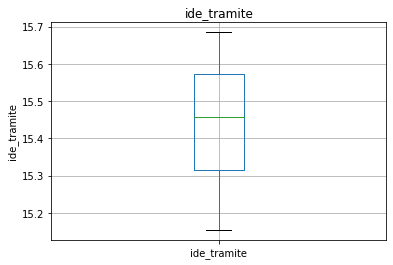

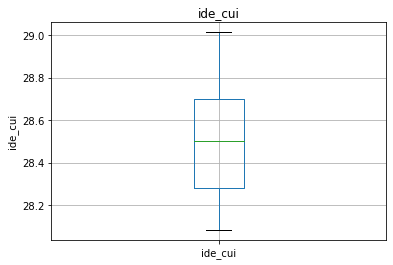

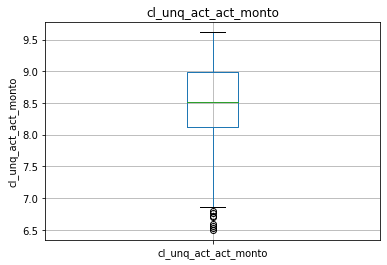

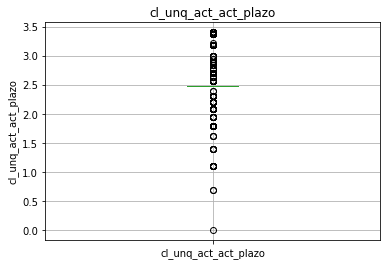

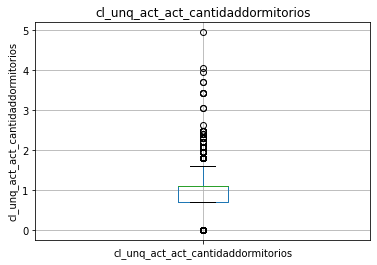

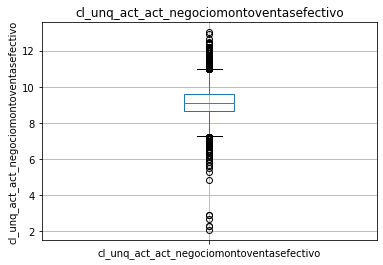

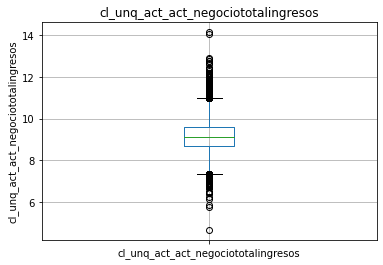

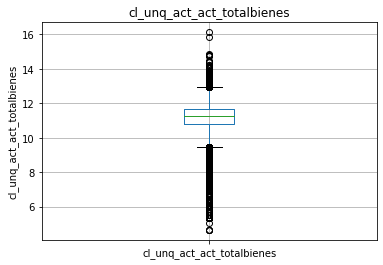

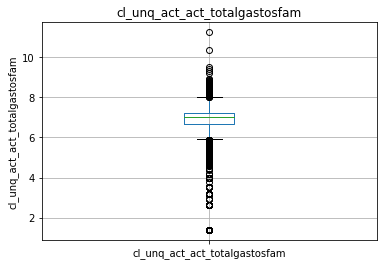

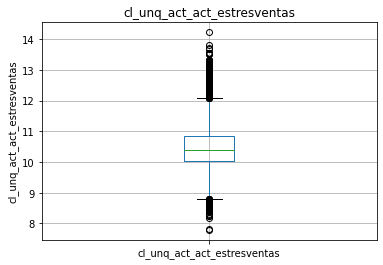

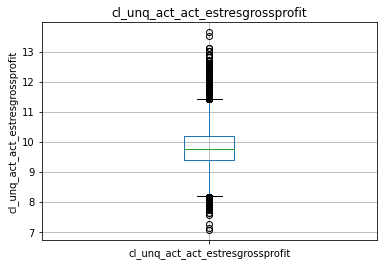

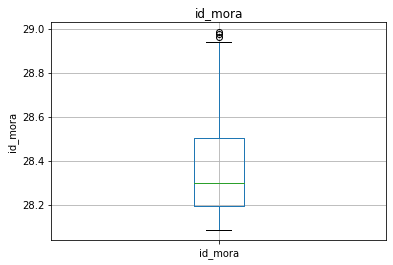

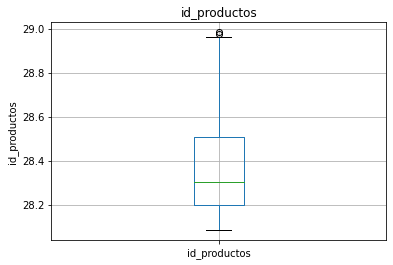

In [31]:
# let's make boxplots to visualise outliers in the continuous variables


def find_outliers(df, var):
    df = df.copy()

    # log does not take negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()


for var in cont_vars:
    find_outliers(data, var)

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our  final machine learning model.


### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [32]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  57


In [33]:
for col_name in date_vars:
    try:
        cat_vars.remove(col_name)
    except:
        print('Column not found', col_name)

Column not found qty_meses_desde_desembolso
Column not found cl_unq_act_act_messolicitud
Column not found cl_unq_act_act_trimestresolicitud
Column not found cl_unq_act_act_fechasolicitud
Column not found cl_unq_act_act_fnacimiento_date_numberlong
Column not found cl_unq_act_act_finicionegocio_date_numberlong


In [34]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,id_solicitud,key_solicitud,id_credito,active_cch3_months,id_tramite,cl_unq_act_act_ptodestino,cl_unq_act_act_longlat,cl_unq_act_act_depnacimiento,cl_unq_act_act_estadocivil,cl_unq_act_act_estadocivilmodificado,cl_unq_act_act_genero,cl_unq_act_act_profesion,cl_unq_act_act_profesionmodificada,cl_unq_act_act_flagpuedeescribir,cl_unq_act_act_flagpuedeleer,cl_unq_act_act_flaghablaespa_ol,cl_unq_act_act_flagpuedefirmar,cl_unq_act_act_flaghablaotroidioma,cl_unq_act_act_nivelacademico,cl_unq_act_act_tiempovivirresidencia,cl_unq_act_act_tipovivienda,cl_unq_act_act_tipolocalidad,cl_unq_act_act_topografia,cl_unq_act_act_flagaccesovehicular,cl_unq_act_act_tipoaccesovehicular,cl_unq_act_act_tipoaccesopeatonal,cl_unq_act_act_flagaccesomensajeros,cl_unq_act_act_flagpidenimpuesto,cl_unq_act_act_vivtipoconstruccion,cl_unq_act_act_flagtienecocina,cl_unq_act_act_flagtienesala,cl_unq_act_act_flagtienejardin,cl_unq_act_act_flagtienegarage,cl_unq_act_act_flagtienecomedor,cl_unq_act_act_vehiculo,cl_unq_act_act_fuenteingresos,cl_unq_act_act_tiponegocio,cl_unq_act_act_depnegocio,cl_unq_act_act_flagvendealcredito,cl_unq_act_act_flagtieneelectricidad,cl_unq_act_act_flagtieneagua,cl_unq_act_act_flagtienetelfijo,cl_unq_act_act_flagtienecelular,cl_unq_act_act_flagtienetvcable,cl_unq_act_act_flagtienerefrigerador,cl_unq_act_act_flagtienelavadora,cl_unq_act_act_flagtienesecadora,cl_unq_act_act_flagtienehorno,cl_unq_act_act_flagtienemicroondas,cl_unq_act_act_flagtienestereo
0,GT-3812915,a86a65bb0e4b3ed8f00610e64f41d4cdb0eb7ef6,GT-02001600500011,-0.16129032258064518.0,GT-3812915,Expansión,"-89.9838,14.6341",JALAPA,Soltero(a),NaN,Femenino,Comerciante,NaN,Si,Si,Si,Si,No,Secundaria Diversificado,Más de 5 años,Propia,Aldea,Montaña,Si,Camioneta,De Tierra,Si,No,Block,Si,No,Si,Si,Si,NO TIENE,Propietario Informal,Propio,JALAPA,No,Si,Si,Si,Si,Si,Si,No,No,No,No,Si
1,GT-3813215,2988b5ee0f3a5d88b3f1249a3ba8351538e227da,GT-02000383630010,-0.16129032258064518.0,GT-3813215,Personal,"-89.5311,14.9733",ZACAPA,Soltero(a),NaN,Femenino,Comerciante,NaN,Si,Si,Si,Si,No,Primaria Incompleta,Más de 5 años,Propia,Aldea,Terreno Plano,Si,Camioneta,De Tierra,Si,No,Bajareque,Si,Si,Si,No,Si,NO TIENE,Propietario Informal,Propio,ZACAPA,No,Si,No,Si,Si,Si,Si,No,No,Si,No,No
2,GT-3813623,ea1fd1cbd5eb43c57798e3f242bd0d272a4ac841,GT-02001849660020,-0.16129032258064512.0,GT-3813623,Capital Trabajo,"-89.8497,14.6644",JALAPA,Soltero(a),Unión Libre,Femenino,Comerciante,Comerciante,No,No,Si,Si,No,Primaria Incompleta,Más de 5 años,Propia,Aldea,Terreno Plano,Si,Camioneta,De Tierra,Si,No,Adobe,Si,Si,Si,No,Si,NO TIENE,Propietario Informal,Propio,JALAPA,No,Si,Si,Si,Si,Si,No,No,No,Si,No,Si
3,GT-3813896,bd4206b27e9469f0951fa9aa4b34dcca3699205c,GT-02003032170010,-0.16129032258064518.0,GT-3813896,Personal,"-89.593,15.0383",ZACAPA,Casado(a),Unión Libre,Masculino,Comerciante,NaN,Si,Si,Si,No,No,Primaria Incompleta,Más de 5 años,Propia,Colonia,Terreno Plano,Si,Camioneta,De Tierra,Si,No,Block,Si,Si,Si,No,Si,NO TIENE,Propietario Informal,Propio,ZACAPA,No,Si,No,Si,Si,Si,Si,Si,No,Si,Si,Si
4,GT-3814047,588f12fbd1512407d0fdee409c068a522674554c,GT-02000583450010,-0.16129032258064512.0,GT-3814047,Personal,NaN,EL PROGRESO,Soltero(a),NaN,Masculino,Técnicos (todos),NaN,Si,Si,Si,Si,No,Primaria,Más de 5 años,Familiar,Caserío,Terreno Plano,Si,Moto,Asfaltada,Si,No,Block,Si,Si,No,No,No,NO TIENE,Asalariado Informal,NaN,NaN,-1.0,Si,Si,Si,Si,Si,Si,No,No,Si,No,Si


#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [35]:
data[cat_vars].nunique()[data[cat_vars].nunique() > 100]

id_solicitud                27560
key_solicitud               27560
id_credito                  27558
active_cch3_months            806
id_tramite                  27560
cl_unq_act_act_longlat      20065
cl_unq_act_act_profesion      129
dtype: int64

All the categorical variables show low cardinality, this means that they have only few different labels.

#### Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of requests:

In [36]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)[target_var].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

id_solicitud
GT-3812915    0.000036
GT-3813215    0.000036
GT-3813623    0.000036
GT-3813896    0.000036
GT-3814047    0.000036
                ...   
GT-6480334    0.000036
GT-6480892    0.000036
GT-6480954    0.000036
GT-6481860    0.000036
GT-6482379    0.000036
Name: maxmora, Length: 27560, dtype: float64

key_solicitud
0001119c87069b20ab506c833e16fe611e0585ac    0.000036
0003bdb6a41d406396632b44635db6fcc75c594c    0.000036
00043a29386fa4a93ba8247862a671b5a5ee3f65    0.000036
0005c30009dae74354746bf125fc1b91e148e5f0    0.000036
000897848b8e4b82fc3db3635bc389817dff2264    0.000036
                                              ...   
ffeb02becbb192222c6e2753a2c5a3790de07f54    0.000036
fff19a5eb53ad7ec5c36e8a6a9e745762bec3a55    0.000036
fff91db768e0f6dbe50b2648b93c6a3ee45a9831    0.000036
fff94056216d573ebf8fef2491637229d0ba4999    0.000036
fff9f4920f74241c5a68ab2ae949ffe13fb5d629    0.000036
Name: maxmora, Length: 27560, dtype: float64

id_credito
GT-02000002190021    0.000036
GT-0

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. We will engineer these variables in our notebook. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the maxmora:

id_solicitud


KeyboardInterrupt: 

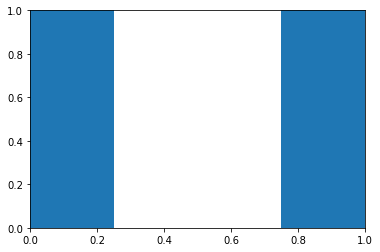

In [38]:
for var in cat_vars:
    # we can re-use the function to determine median
    # sale price, that we created for discrete variables

    analyse_discrete(data, var)

Clearly, the categories give information on the maxMora, as different categories show different median maxMora.

In the next notebook, we will transform these strings / labels into numbers, so that we capture this information and transform it into a monotonic relationship between the category and the house price.